In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', None)        # Tidak memotong tampilan jadi beberapa baris
pd.set_option('display.max_colwidth', None) # Menampilkan seluruh isi kolom (untuk string panjang)

In [6]:
df = pd.read_csv(r"D:\Dhika Ramadhan Saputra\Data Analist\Full Project\Tren Penerimaan MABA UMP 2014 - 2024\dataset\raw\(raw) dataset gabungan (2014-2024).csv")
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27600\4137464401.py:1: DtypeWarning: Columns (3,4,5,17,19,23,24,25,26,27,28,29,30,31,32,33,34,36,38,39,40,41,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Dhika Ramadhan Saputra\Data Analist\Full Project\Tren Penerimaan MABA UMP 2014 - 2024\dataset\raw\(raw) dataset gabungan (2014-2024).csv")


,NO,TANGGAL DAFTAR,NOPEN,NAMA,NIK,EMAIL,JALUR,TAHUN,GELOMBANG,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,"TEMPAT, TANGGAL LAHIR",USIA,DETAIL USIA,KELAMIN,GOLDAR,STATUS KAWIN,BB,TB,ASAL SLTA,JURUSAN,TH LULUS,ALAMAT ASAL,ALAMAT DOMISILI,WARGA NEGARA,NO HP,NO WA,NAMA AYAH,NAMA IBU,PEND. AYAH,PEND. IBU,PEKERJAAN AYAH,PEKERJAAN IBU,PENGHASILAN ORANG TUA,ALAMAT ORANG TUA,NO HP ORANG TUA,NO WA ORANG TUA,NIM,TGL DITERIMA,BATAS REGISTRASI,Rerata Mapel Smt 1,Rerata Mapel Smt 2,Rerata Mapel Smt 3,Rerata Mapel Smt 4,MTK Smt 1,MTK Smt 2,MTK Smt 3,MTK Smt 4,B. Inggris Smt 1,B. Inggris Smt 2,B. Inggris Smt 3,B. Inggris Smt 4,B. Indonesia Smt 1,B. Indonesia Smt 2,B. Indonesia Smt 3,B. Indonesia Smt 4,Mapel Kejuruan Smt 1,Mapel Kejuruan Smt 2,Mapel Kejuruan Smt 3,Mapel Kejuruan Smt 4,File Raport,File Rekomendasi,File Tes Kesehatan,File Tes Napza,Organisasi,Prestasi,Total Nilai UBTK,Rerata UTBK,Tgl CBT,Nilai CBT
0,1,NaN,1421268982,NaN,NaN,NaN,JALUR CBT,2014,NaN,Farmasi,Fakultas Farmasi,NaN,NaN,NaN,NaN,",",NaN,NaN,NaN,0,BELUM MENIKAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-02 00:00:00,02/17/2014,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN
1,2,NaN,1421268953,NaN,NaN,NaN,JALUR CBT,2014,NaN,Pendidikan Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,",",NaN,NaN,NaN,0,BELUM MENIKAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-02 00:00:00,02/17/2014,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN
2,3,NaN,1421268986,NaN,NaN,NaN,JALUR CBT,2014,NaN,Pendidikan Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,",",NaN,NaN,NaN,0,BELUM MENIKAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-02 00:00:00,02/17/2014,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN
3,4,NaN,1421268955,NaN,NaN,NaN,JALUR CBT,2014,NaN,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,NaN,NaN,",",NaN,NaN,NaN,0,BELUM MENIKAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-02 00:00:00,02/17/2014,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN
4,5,NaN,1421268966,NaN,NaN,NaN,JALUR CBT,2014,NaN,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Sejarah,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,",",NaN,NaN,NaN,0,BELUM MENIKAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-02 00:00:00,02/17/2014,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN


### Validasi Dataset

In [3]:
# export nama kolom + null values
# df.isnull().sum().to_excel('D:\Dhika Ramadhan Saputra\Data Analist\Full Project\Tren Penerimaan MABA UMP 2014 - 2024\dataset\jumlah missing values.xlsx', index=False)

# missing_df = df.isnull().sum().reset_index()
# missing_df.columns = ['Column', 'MissingValues']
# missing_df.to_excel(r'D:\Dhika Ramadhan Saputra\Data Analist\Full Project\Tren Penerimaan MABA UMP 2014 - 2024\dataset\jumlah missing values.xlsx', index=False)

In [4]:
# mengambil kolom yang sudah dipilih
selected_columns = [
    'NOPEN',
    'JALUR',
    'TAHUN',
    'PILIHAN PRODI 1',
    'FAKULTAS PRODI 1',
    'PILIHAN PRODI 2',
    'FAKULTAS PRODI 2',
    'DITERIMA PRODI',
    'FAKULTAS PRODI DITERMA',
    'USIA',
    'ASAL SLTA',
    'JURUSAN',
    'ALAMAT ASAL',
    'ALAMAT DOMISILI',
    'PEND. AYAH',
    'PEND. IBU',
    'PEKERJAAN IBU',
    'ALAMAT ORANG TUA',
]

# Pilih kolom-kolom tersebut dan simpan kembali ke df
df = df[selected_columns]
df.head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1421268966,JALUR CBT,2014,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Sejarah,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Struktur data

In [5]:
# mengecek struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65954 entries, 0 to 65953
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NOPEN                   65954 non-null  int64  
 1   JALUR                   65954 non-null  object 
 2   TAHUN                   65954 non-null  int64  
 3   PILIHAN PRODI 1         65898 non-null  object 
 4   FAKULTAS PRODI 1        65898 non-null  object 
 5   PILIHAN PRODI 2         45721 non-null  object 
 6   FAKULTAS PRODI 2        45721 non-null  object 
 7   DITERIMA PRODI          58417 non-null  object 
 8   FAKULTAS PRODI DITERMA  58417 non-null  object 
 9   USIA                    38270 non-null  float64
 10  ASAL SLTA               32175 non-null  object 
 11  JURUSAN                 38057 non-null  object 
 12  ALAMAT ASAL             36780 non-null  object 
 13  ALAMAT DOMISILI         36782 non-null  object 
 14  PEND. AYAH              32100 non-null

#### Data duplikat

In [6]:
# mengecek data duplikat 100% - ditemukan 54
df[df.duplicated(keep='first')]

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
13531,1713044,PROFESI DOKTER,2017,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,NaN,NaN,SMA/MA IPA,PERUMAHAN FIRDAUS ESTATE BLOK F1 SOKARAJA KAB BANYUMAS,-,NaN,NaN,NaN,-
13533,1713046,PROFESI DOKTER,2017,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,NaN,NaN,SMA/MA IPA,DESA PLATAR RT 02 RW 01 KEC TAHUNA KAB JEPARA,-,NaN,NaN,NaN,-
13534,1713046,PROFESI DOKTER,2017,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,NaN,NaN,SMA/MA IPA,DESA PLATAR RT 02 RW 01 KEC TAHUNA KAB JEPARA,-,NaN,NaN,NaN,-
13535,1713046,PROFESI DOKTER,2017,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,NaN,NaN,SMA/MA IPA,DESA PLATAR RT 02 RW 01 KEC TAHUNA KAB JEPARA,-,NaN,NaN,NaN,-
13540,1713044,PROFESI DOKTER,2017,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,NaN,NaN,SMA/MA IPA,PERUMAHAN FIRDAUS ESTATE BLOK F1 SOKARAJA KAB BANYUMAS,-,NaN,NaN,NaN,-
13541,1713044,PROFESI DOKTER,2017,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,NaN,NaN,SMA/MA IPA,PERUMAHAN FIRDAUS ESTATE BLOK F1 SOKARAJA KAB BANYUMAS,-,NaN,NaN,NaN,-
13908,1713018,PROFESI DOKTER,2017,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,SMA/MA IPA,JL KETUHU RT 04 RW 03 KEL WIRASANA KEC PURBALINGGA KAB PURBALINGGA,-,NaN,NaN,NaN,-
13909,1713045,PROFESI DOKTER,2017,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,SMA/MA IPA,JL PAHLAWAN 12 NO 433 RT 003 RW 001 KELURAHAN BUKIT MERAPIN KEC GERUNGGANG PANGKALPINANG BANGKA,-,NaN,NaN,NaN,-
13917,1713005,PROFESI DOKTER,2017,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,SMA/MA IPA,DESA KARANGPUCUNG RT 03 RW 05 KEC.TAMBAK KAB.BANYUMAS KODE POS 53196,"KARANG PUCUNG, -, RT. 03, RW. 05, KARANG PUCUNG, TAMBAK, JAWA TENGAH, KODE POS: 53196, TELP: 0281-",NaN,NaN,NaN,-
13918,1713002,PROFESI DOKTER,2017,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,Profesi Dokter,Fakultas Kedokteran,NaN,NaN,SMA/MA IPA,KARANGDAWA NO 17 RT 01 RW 01 MARGASARI TEGAL,-,NaN,NaN,NaN,-


#### Missing values

In [7]:
# mengecek missing values
print(pd.DataFrame({
    'Missing': df.isnull().sum(),
    'Persentase': ((df.isnull().sum() / len(df)) * 100).map("{:.2f}%".format)
}))

                        Missing Persentase
NOPEN                         0      0.00%
JALUR                         0      0.00%
TAHUN                         0      0.00%
PILIHAN PRODI 1              56      0.08%
FAKULTAS PRODI 1             56      0.08%
PILIHAN PRODI 2           20233     30.68%
FAKULTAS PRODI 2          20233     30.68%
DITERIMA PRODI             7537     11.43%
FAKULTAS PRODI DITERMA     7537     11.43%
USIA                      27684     41.97%
ASAL SLTA                 33779     51.22%
JURUSAN                   27897     42.30%
ALAMAT ASAL               29174     44.23%
ALAMAT DOMISILI           29172     44.23%
PEND. AYAH                33854     51.33%
PEND. IBU                 33854     51.33%
PEKERJAAN IBU             33854     51.33%
ALAMAT ORANG TUA          29673     44.99%


#### Distribusi data

##### kolom JALUR

In [8]:
# kolom 'JALUR'
df['JALUR'].value_counts()

JALUR
JALUR CBT                                      33192
JALUR NILAI RAPOR                              13389
JALUR NILAI SNBT                                4242
PROFESI APOTEKER                                2928
PPG                                             2628
JALUR KEDOKTERAN                                2234
PASCASARJANA                                    1634
JALUR MINAT                                     1114
PROFESI NERS                                     918
JALUR UNGGUL                                     829
RPL KEBIDANAN S1                                 360
PROFESI DOKTER                                   304
BACHELOR PROGRAM (INTERNATIONAL CLASS)           283
PROFESI BIDAN                                    265
BACHELOR PROGRAM (REGULER)                       230
RPL PENGAKUAN SKS (PG PAUD & AGROTEKNOLOGI)      219
RPL KEPERAWATAN S1                               184
I'IDAD LUGHAWI MA'HAD AL IMAM MALIK              170
JALUR ORGANISASI                        

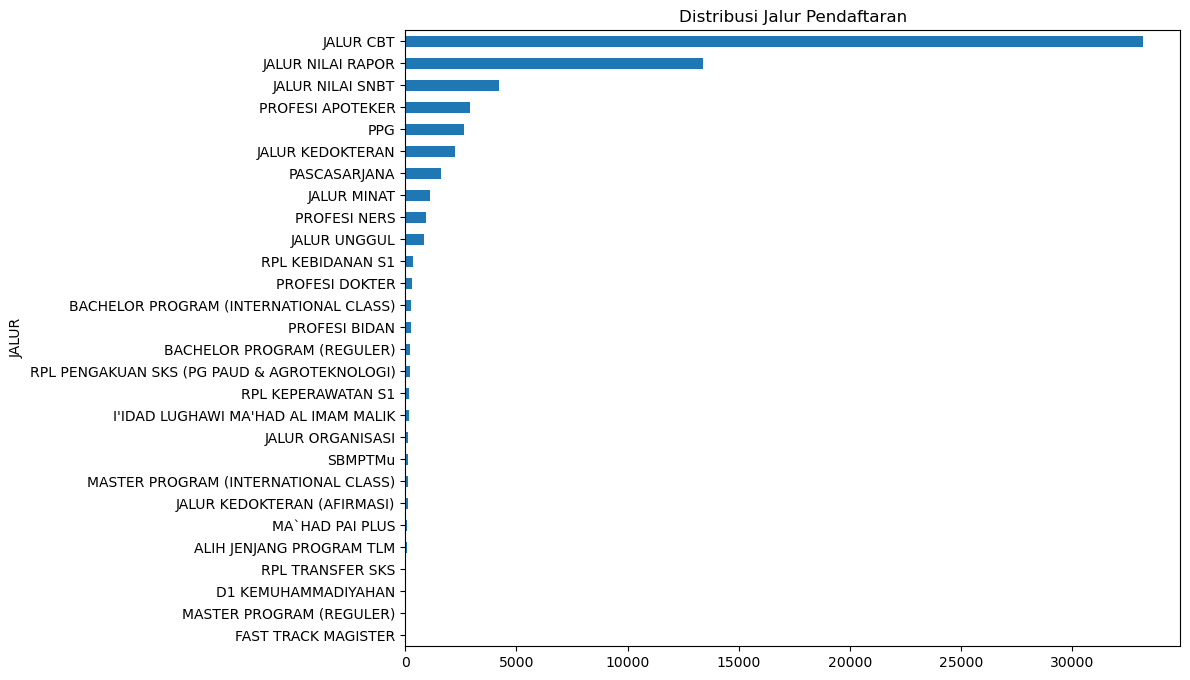

In [9]:
# kolom 'JALUR' - visualisasi
df['JALUR'].value_counts(ascending=True).plot(kind='barh', figsize=(10,8))
plt.title('Distribusi Jalur Pendaftaran')
plt.show()

##### kolom 'TAHUN'

In [10]:
# kolom 'TAHUN'
df['TAHUN'].value_counts()

TAHUN
2023    9138
2024    9031
2021    7885
2022    7765
2019    5365
2020    5109
2014    4540
2015    4460
2018    4452
2017    4194
2016    4015
Name: count, dtype: int64

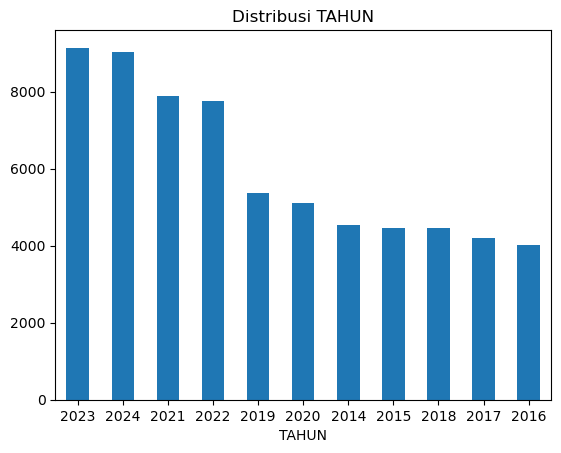

In [11]:
# kolom 'TAHUN' - visualisasi
df['TAHUN'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Distribusi TAHUN')
plt.show()

##### kolom 'PILIHAN PRODI 1'

In [12]:
# kolom 'PILIHAN PRODI 1'
df['PILIHAN PRODI 1'].value_counts()

PILIHAN PRODI 1
Farmasi                                            8224
Manajemen S1                                       6153
Pendidikan Dokter                                  4889
Psikologi                                          3650
Keperawatan S1                                     3484
Program Profesi Apoteker                           3105
Pendidikan Guru Sekolah Dasar                      2932
Akuntansi S1                                       2830
Teknik Informatika                                 2579
Ilmu Hukum                                         2327
Teknik Sipil                                       1956
Pendidikan Bahasa dan Sastra Indonesia             1685
Teknologi Laboratorium Medik                       1505
Pendidikan Agama Islam                             1402
Pendidikan Bahasa Inggris                          1314
Agribisnis                                         1222
PPG Pendidikan Guru Sekolah Dasar                  1206
Program Pendidikan Ners         

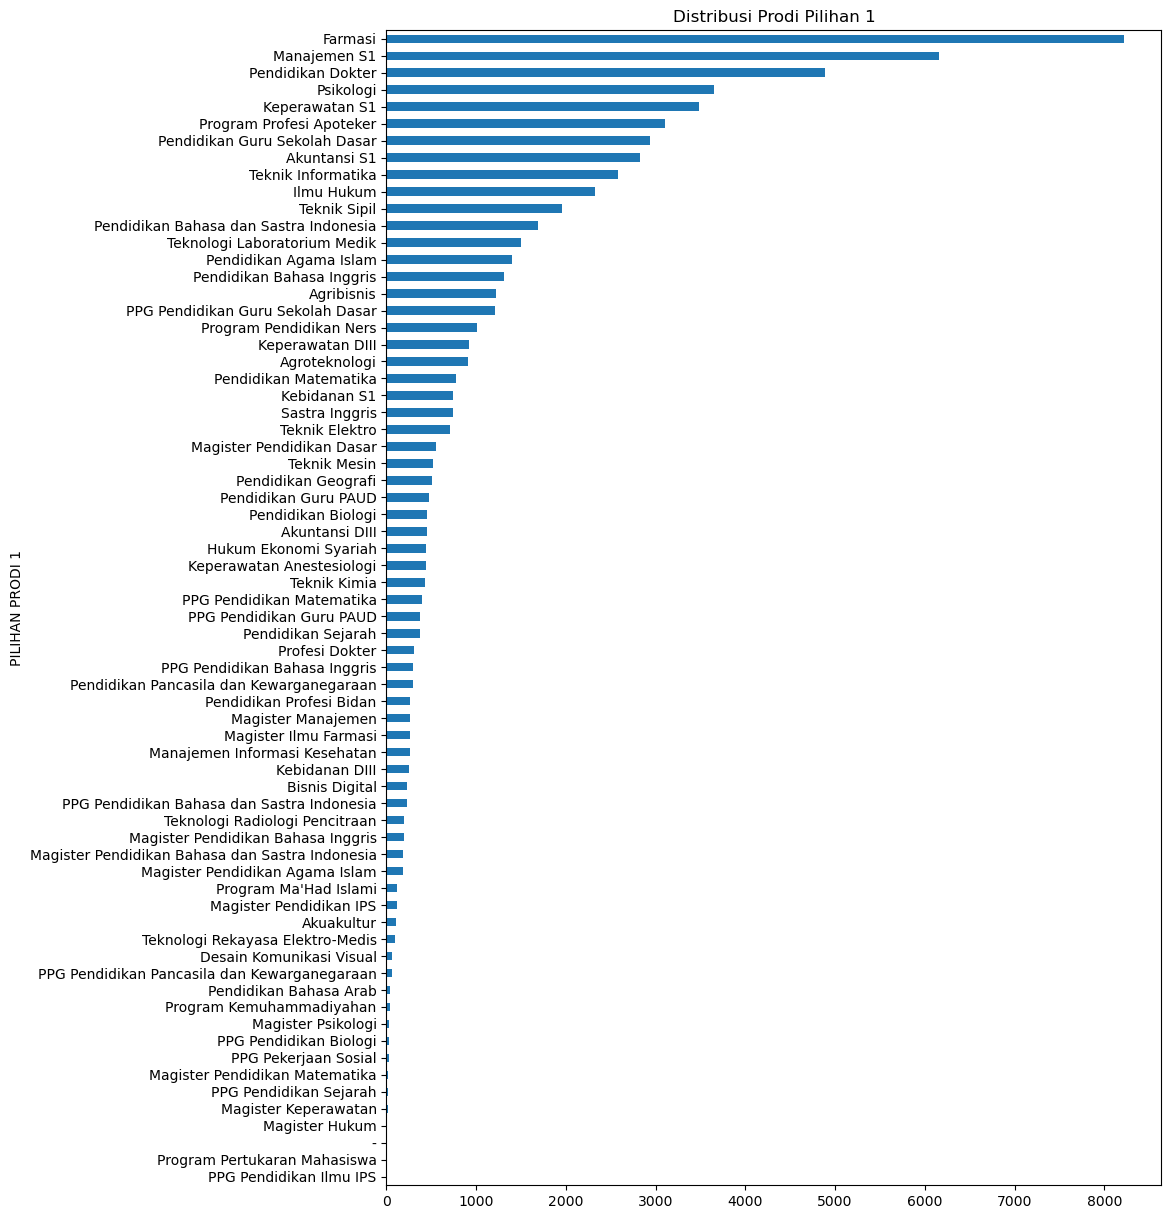

In [13]:
# kolom 'PILIHAN PRODI 1' - visualisasi
df['PILIHAN PRODI 1'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 15))
plt.title('Distribusi Prodi Pilihan 1')
plt.show()

##### kolom 'FAKULTAS PRODI 1'

In [14]:
# kolom 'FAKULTAS PRODI 1'
df['FAKULTAS PRODI 1'].value_counts()

FAKULTAS PRODI 1
Fakultas Farmasi                         11593
Fakultas Keguruan dan Ilmu Pendidikan    11486
Fakultas Ekonomi dan Bisnis               9927
Fakultas Ilmu Kesehatan                   9175
Fakultas Teknik dan Sains                 6192
Fakultas Kedokteran                       5195
Fakultas Psikologi                        3682
Fakultas Hukum                            2338
Fakultas Pertanian dan Perikanan          2239
Fakultas Agama Islam                      2194
Pascasarjana                              1071
Fakultas Ilmu Budaya dan Komunikasi        800
-                                            6
Name: count, dtype: int64

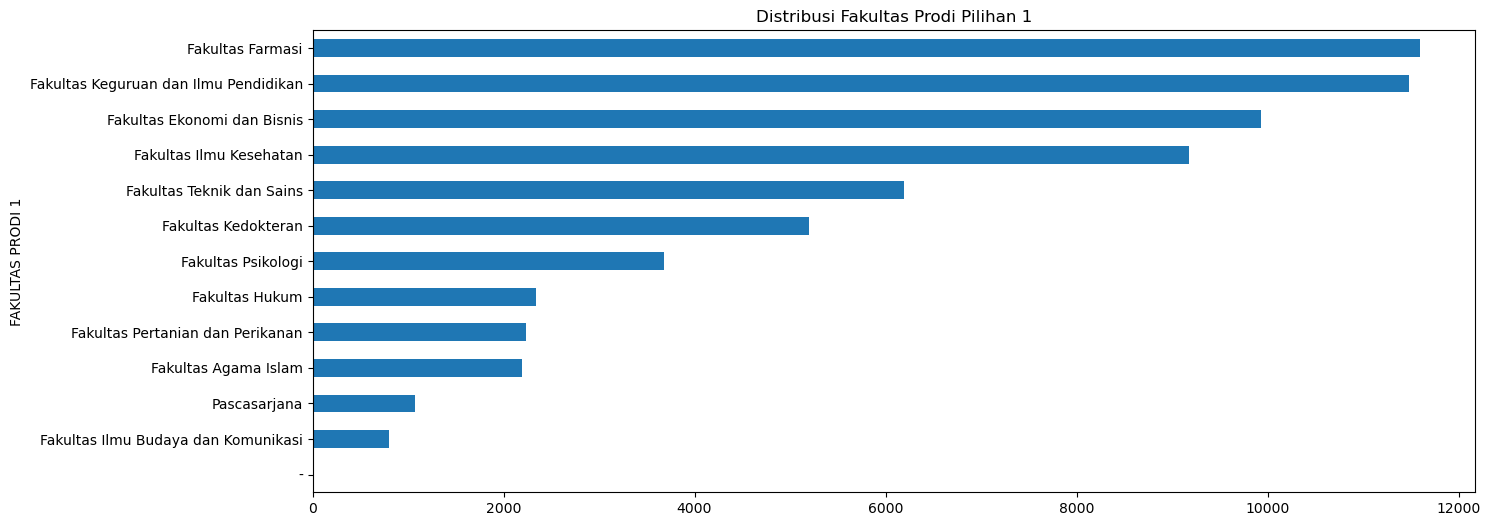

In [15]:
# kolom 'FAKULTAS PRODI 1' - visualisasi
df['FAKULTAS PRODI 1'].value_counts(ascending=True).plot(kind='barh', figsize=(15, 6))
plt.title('Distribusi Fakultas Prodi Pilihan 1')
plt.show()

##### kolom 'PILIHAN PRODI 2'

In [16]:
##### kolom 'PILIHAN PRODI 2'
df['PILIHAN PRODI 2'].value_counts()

PILIHAN PRODI 2
Manajemen S1                                4618
Psikologi                                   4271
Keperawatan S1                              3688
Akuntansi S1                                3110
Ilmu Hukum                                  2391
Teknik Informatika                          2338
Pendidikan Bahasa dan Sastra Indonesia      1791
Agribisnis                                  1725
Teknik Sipil                                1717
Teknologi Laboratorium Medik                1317
Pendidikan Guru Sekolah Dasar               1316
Keperawatan DIII                            1287
Agroteknologi                               1253
Kebidanan S1                                1057
Sastra Inggris                              1017
Teknik Elektro                              1010
Pendidikan Bahasa Inggris                    980
Pendidikan Agama Islam                       929
Keperawatan Anestesiologi                    892
Pendidikan Biologi                           856
Huku

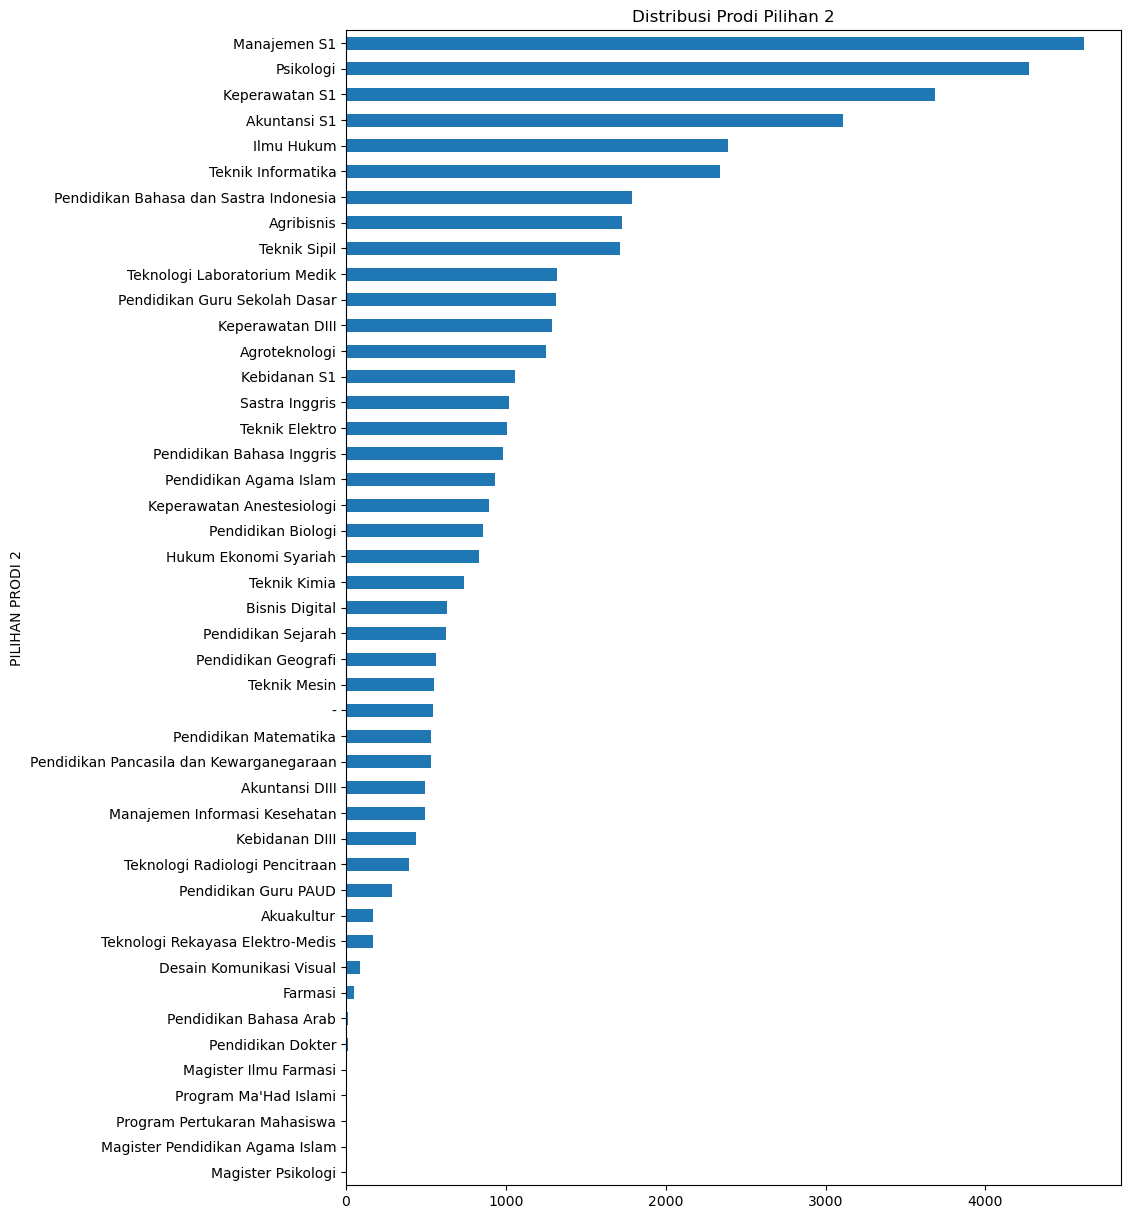

In [17]:
# kolom 'PILIHAN PRODI 2' - visualisasi
df['PILIHAN PRODI 2'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 15))
plt.title('Distribusi Prodi Pilihan 2')
plt.show()

##### kolom 'FAKULTAS PRODI 2'

In [18]:
# kolom 'FAKULTAS PRODI 2'
df['FAKULTAS PRODI 2'].value_counts()

FAKULTAS PRODI 2
Fakultas Ilmu Kesehatan                  9729
Fakultas Ekonomi dan Bisnis              8855
Fakultas Keguruan dan Ilmu Pendidikan    7497
Fakultas Teknik dan Sains                6348
Fakultas Psikologi                       4272
Fakultas Pertanian dan Perikanan         3147
Fakultas Hukum                           2391
Fakultas Agama Islam                     1761
Fakultas Ilmu Budaya dan Komunikasi      1106
-                                         549
Fakultas Farmasi                           56
Fakultas Kedokteran                        10
Name: count, dtype: int64

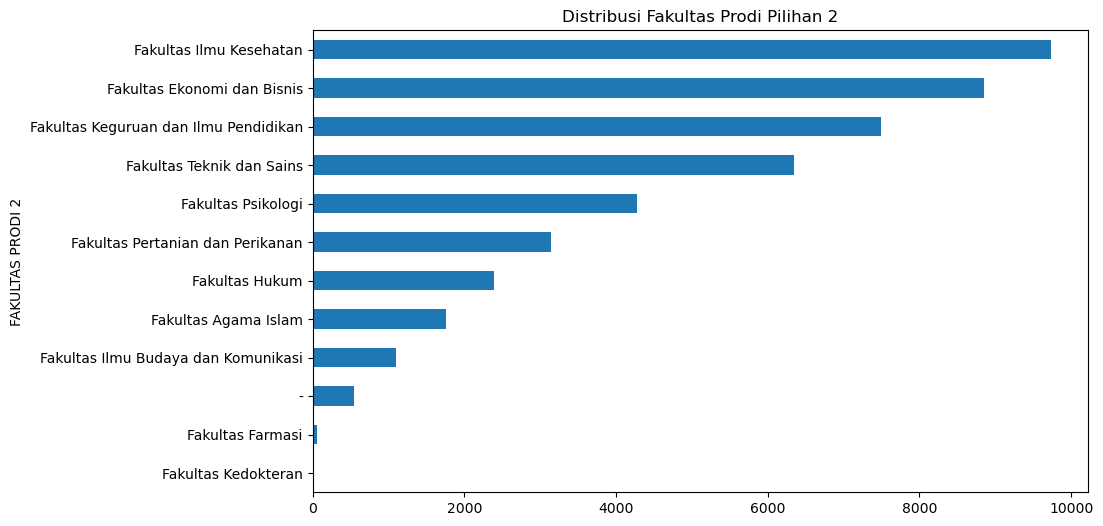

In [19]:
# kolom 'FAKULTAS PRODI 2' - visualisasi
df['FAKULTAS PRODI 2'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribusi Fakultas Prodi Pilihan 2')
plt.show()

##### kolom 'DITERIMA PRODI'

In [20]:
# kolom 'DITERIMA PRODI'
df['DITERIMA PRODI'].value_counts()

DITERIMA PRODI
-                                                  11260
Manajemen S1                                        4796
Keperawatan S1                                      3752
Psikologi                                           3374
Akuntansi S1                                        2312
Pendidikan Guru Sekolah Dasar                       2295
Teknik Informatika                                  2104
Farmasi                                             1924
Ilmu Hukum                                          1781
Teknik Sipil                                        1642
Teknologi Laboratorium Medik                        1331
Pendidikan Bahasa dan Sastra Indonesia              1251
Pendidikan Dokter                                   1231
PPG Pendidikan Guru Sekolah Dasar                   1205
Pendidikan Agama Islam                              1068
Pendidikan Bahasa Inggris                           1057
Agribisnis                                           954
Keperawatan DIII

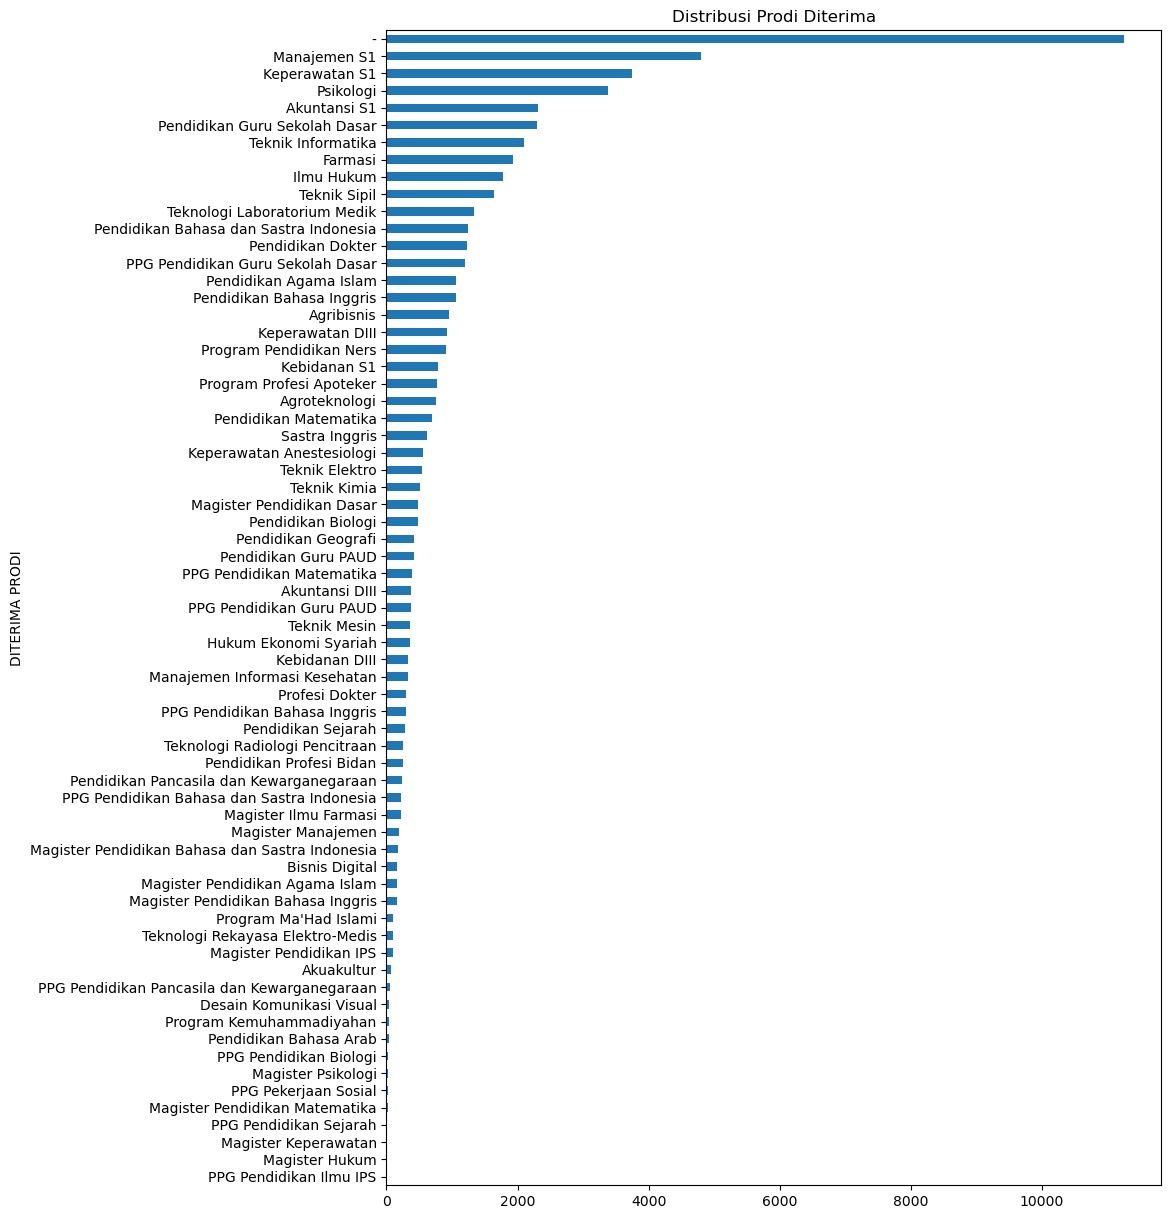

In [21]:
# kolom 'DITERIMA PRODI' - visualisasi
df['DITERIMA PRODI'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 15))
plt.title('Distribusi Prodi Diterima')
plt.show()

##### kolom 'FAKULTAS PRODI DITERMA'

In [22]:
# kolom 'FAKULTAS PRODI DITERMA'
df['FAKULTAS PRODI DITERMA'].value_counts()

FAKULTAS PRODI DITERMA
-                                        11260
Fakultas Keguruan dan Ilmu Pendidikan     9822
Fakultas Ilmu Kesehatan                   9551
Fakultas Ekonomi dan Bisnis               7843
Fakultas Teknik dan Sains                 5161
Fakultas Psikologi                        3403
Fakultas Farmasi                          2913
Fakultas Hukum                            1792
Fakultas Pertanian dan Perikanan          1791
Fakultas Agama Islam                      1738
Fakultas Kedokteran                       1526
Pascasarjana                               947
Fakultas Ilmu Budaya dan Komunikasi        670
Name: count, dtype: int64

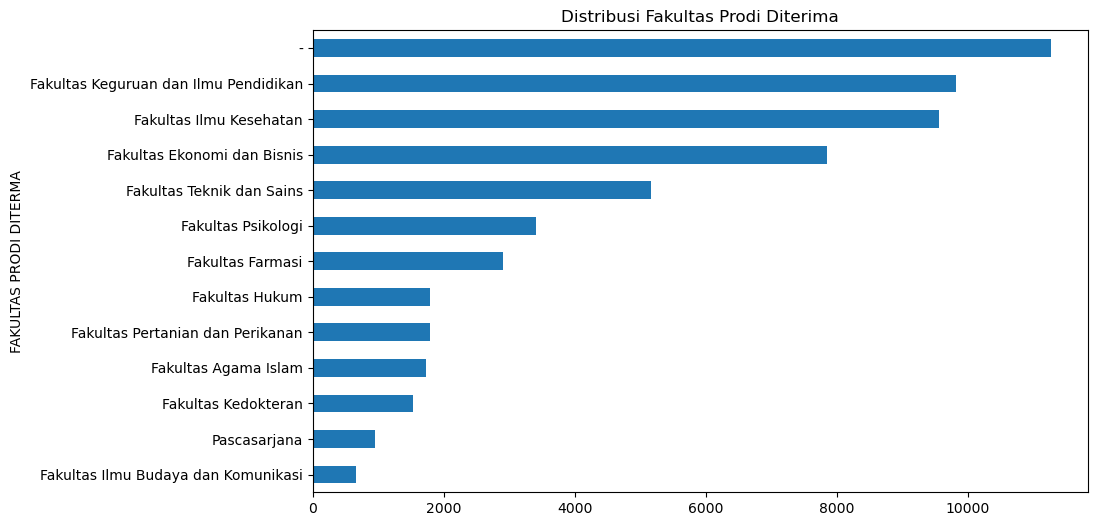

In [23]:
# kolom 'FAKULTAS PRODI DITERMA' - visualisasi
df['FAKULTAS PRODI DITERMA'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribusi Fakultas Prodi Diterima')
plt.show()

##### kolom 'USIA'

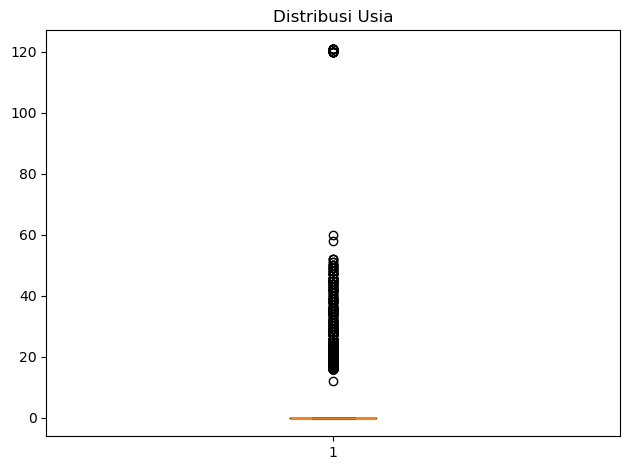

In [24]:
# kolom 'USIA' - visualisasi
plt.boxplot(df['USIA'].dropna())
plt.title('Distribusi Usia')
plt.tight_layout()
plt.show()

In [25]:
# kolom 'USIA'
df['USIA'].value_counts()

USIA
0.0      32628
18.0      2395
17.0      1410
19.0       702
22.0       244
20.0       175
23.0       174
21.0       126
16.0        58
24.0        53
25.0        31
121.0       26
26.0        19
36.0        17
29.0        16
35.0        15
120.0       15
28.0        14
31.0        12
42.0        11
27.0        10
45.0        10
39.0        10
34.0         9
38.0         9
47.0         8
46.0         7
44.0         7
32.0         7
30.0         7
43.0         6
49.0         6
48.0         5
50.0         5
40.0         4
33.0         4
41.0         4
37.0         3
52.0         3
51.0         2
60.0         1
58.0         1
12.0         1
Name: count, dtype: int64

##### kolom 'JURUSAN'

In [26]:
# kolom 'JURUSAN'
df['JURUSAN'].value_counts()

JURUSAN
SMA/MA IPA                                                   21123
SMA/MA IPS                                                    7882
SMK TEKNIK (TKJ, RPL, Otomotif, Pertanian, Agronomi, dll)     3297
SMK FARMASI                                                   2059
SMK NON TEKNIK (Akuntansi, Adm. Perkantoran, dll)             1607
SMK KESEHATAN                                                 1035
SMA/MA AGAMA                                                   619
SMA/MA BAHASA                                                  435
Name: count, dtype: int64

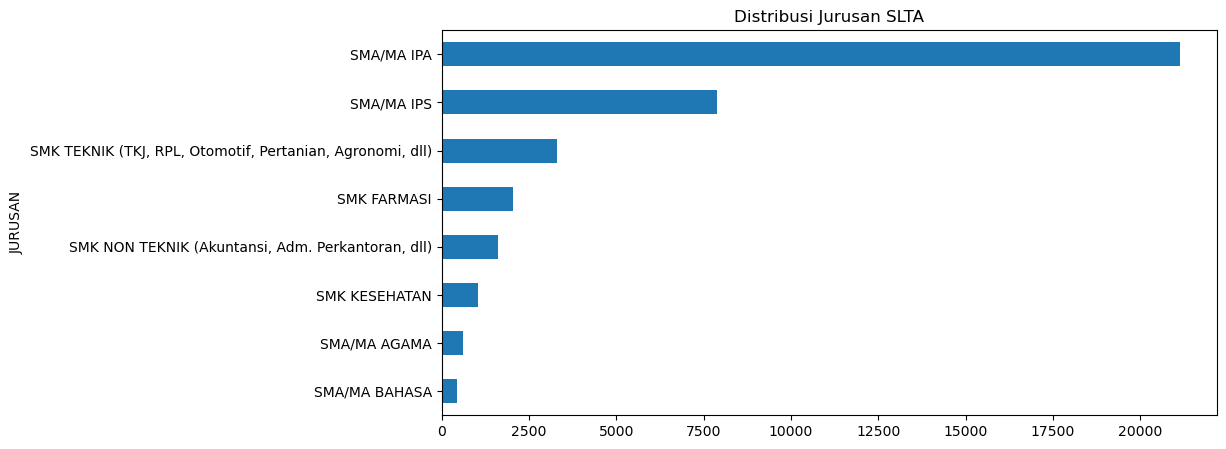

In [27]:
# kolom 'JURUSAN'- visualisasi
df['JURUSAN'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 5))
plt.title('Distribusi Jurusan SLTA')
plt.show()

##### kolom 'PEND. AYAH'

In [28]:
# kolom 'PEND. AYAH'
df['PEND. AYAH'].value_counts()

PEND. AYAH
SMA / Sederajat    11873
SD / Sederajat      5938
S1                  5850
SMP / Sederajat     4092
D3                  1350
S2                  1156
Putus SD             510
Tidak Sekolah        273
D2                   191
Paket C              153
D4                   143
D1                   136
Lainnya              125
Profesi              118
S3                    78
PAUD                  49
Sp-1                  19
Paket B               15
TK / Sederajat        10
Non formal             9
Informal               9
Paket A                3
Name: count, dtype: int64

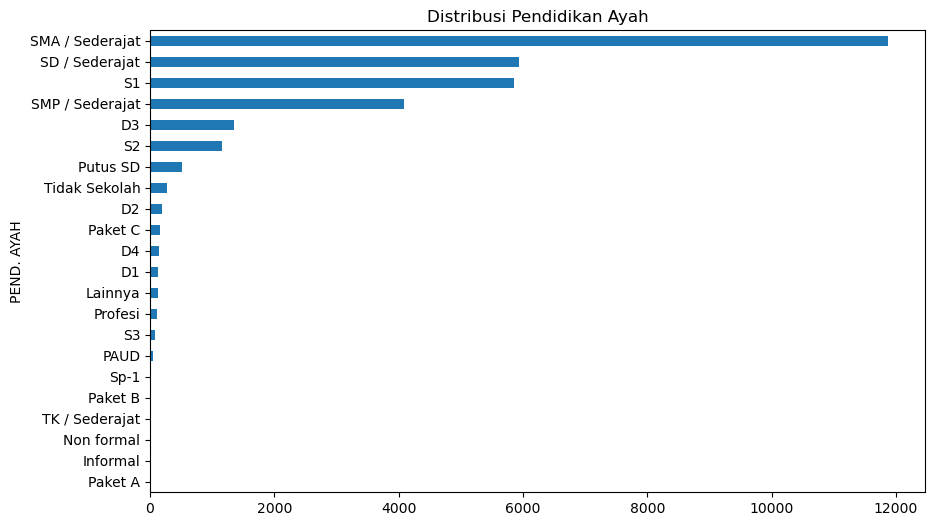

In [29]:
# kolom 'PEND. AYAH' - visualisasi
df['PEND. AYAH'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribusi Pendidikan Ayah')
plt.show()

##### kolom 'PEND. IBU'

In [30]:
# kolom 'PEND. IBU'
df['PEND. IBU'].value_counts()

PEND. IBU
SMA / Sederajat    10130
SD / Sederajat      6454
S1                  5724
SMP / Sederajat     5630
D3                  1746
S2                   533
Putus SD             497
Tidak Sekolah        312
D4                   210
D1                   206
Profesi              171
D2                   155
Paket C              112
Lainnya               69
PAUD                  40
S3                    33
Paket B               25
TK / Sederajat        23
Informal              11
Non formal             8
Sp-1                   6
Paket A                5
Name: count, dtype: int64

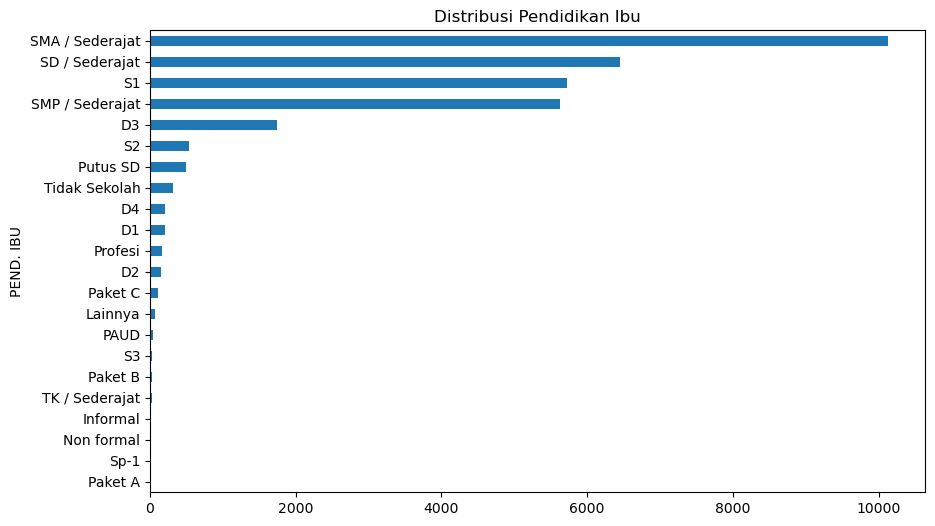

In [31]:
# kolom 'PEND. IBU' - visualisasi
df['PEND. IBU'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribusi Pendidikan Ibu')
plt.show()

##### kolom 'PEKERJAAN IBU'

In [32]:
# kolom 'PEKERJAAN IBU'
df['PEKERJAAN IBU'].value_counts()

PEKERJAAN IBU
Tidak bekerja      13339
PNS/TNI/Polri       4193
Lainnya             3491
Pedagang Kecil      2645
Wiraswasta          2325
Karyawan Swasta     1462
Petani              1316
Sudah Meninggal      947
Wirausaha            925
Buruh                729
Pensiunan            501
Pedagang Besar       169
Peternak              42
Nelayan               16
Name: count, dtype: int64

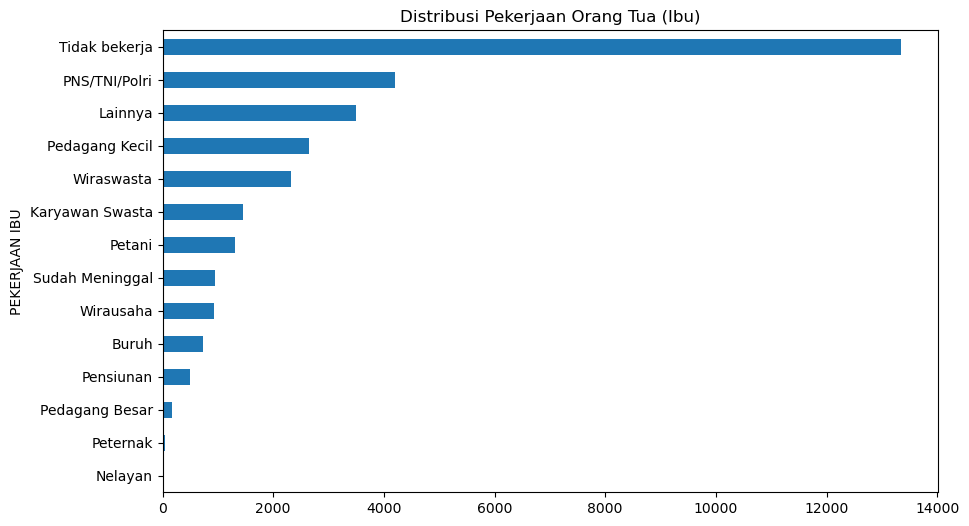

In [33]:
# kolom 'PEKERJAAN IBU'
df['PEKERJAAN IBU'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribusi Pekerjaan Orang Tua (Ibu)')
plt.show()

### Pre-processing

##### Struktur dataset

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65954 entries, 0 to 65953
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NOPEN                   65954 non-null  int64  
 1   JALUR                   65954 non-null  object 
 2   TAHUN                   65954 non-null  int64  
 3   PILIHAN PRODI 1         65898 non-null  object 
 4   FAKULTAS PRODI 1        65898 non-null  object 
 5   PILIHAN PRODI 2         45721 non-null  object 
 6   FAKULTAS PRODI 2        45721 non-null  object 
 7   DITERIMA PRODI          58417 non-null  object 
 8   FAKULTAS PRODI DITERMA  58417 non-null  object 
 9   USIA                    38270 non-null  float64
 10  ASAL SLTA               32175 non-null  object 
 11  JURUSAN                 38057 non-null  object 
 12  ALAMAT ASAL             36780 non-null  object 
 13  ALAMAT DOMISILI         36782 non-null  object 
 14  PEND. AYAH              32100 non-null

In [35]:
# mengganti tipe data USIA dari float menjadi integer
df['USIA'] = df['USIA'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65954 entries, 0 to 65953
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NOPEN                   65954 non-null  int64 
 1   JALUR                   65954 non-null  object
 2   TAHUN                   65954 non-null  int64 
 3   PILIHAN PRODI 1         65898 non-null  object
 4   FAKULTAS PRODI 1        65898 non-null  object
 5   PILIHAN PRODI 2         45721 non-null  object
 6   FAKULTAS PRODI 2        45721 non-null  object
 7   DITERIMA PRODI          58417 non-null  object
 8   FAKULTAS PRODI DITERMA  58417 non-null  object
 9   USIA                    38270 non-null  Int64 
 10  ASAL SLTA               32175 non-null  object
 11  JURUSAN                 38057 non-null  object
 12  ALAMAT ASAL             36780 non-null  object
 13  ALAMAT DOMISILI         36782 non-null  object
 14  PEND. AYAH              32100 non-null  object
 15  PE

In [36]:
# menyamakan semua format tanggal (bukan tipe datanya)
def convert_tanggal(tanggal):
    formats = ['%Y-%m-%d %H:%M:%S', '%m/%d/%Y', '%d/%m/%Y']  # Daftar format yang mungkin
    for fmt in formats:
        try:
            return pd.to_datetime(tanggal, format=fmt).date()
        except (ValueError, TypeError):
            continue
    return None  # Jika tidak ada format yang sesuai

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65954 entries, 0 to 65953
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NOPEN                   65954 non-null  int64 
 1   JALUR                   65954 non-null  object
 2   TAHUN                   65954 non-null  int64 
 3   PILIHAN PRODI 1         65898 non-null  object
 4   FAKULTAS PRODI 1        65898 non-null  object
 5   PILIHAN PRODI 2         45721 non-null  object
 6   FAKULTAS PRODI 2        45721 non-null  object
 7   DITERIMA PRODI          58417 non-null  object
 8   FAKULTAS PRODI DITERMA  58417 non-null  object
 9   USIA                    38270 non-null  Int64 
 10  ASAL SLTA               32175 non-null  object
 11  JURUSAN                 38057 non-null  object
 12  ALAMAT ASAL             36780 non-null  object
 13  ALAMAT DOMISILI         36782 non-null  object
 14  PEND. AYAH              32100 non-null  object
 15  PE

In [38]:
df.head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1421268966,JALUR CBT,2014,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Sejarah,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data duplikat

In [39]:
# total data - sebelum menghapus duplikat
len(df)

65954

In [40]:
# menghapus duplikat
df.drop_duplicates(inplace=True)

In [41]:
# total data - setelah menghapus duplikat
len(df)

65900

#### Missing values dan distribusi data

##### kolom 'PILIHAN PRODI 1'

In [42]:
# mengecek sampel data missing
df[df['PILIHAN PRODI 1'].isnull()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
4729,1521417143,JALUR CBT,2015,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9191,1621596496,JALUR CBT,2016,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9418,1621641457,JALUR CBT,2016,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9492,1621649213,JALUR CBT,2016,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11123,1621634012,JALUR CBT,2016,NaN,NaN,NaN,NaN,Agribisnis,Fakultas Pertanian dan Perikanan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# merubah missing values menjadi "Data hilang"
df['PILIHAN PRODI 1'].fillna("Data Hilang/Tidak Mengisi", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\1065441723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PILIHAN PRODI 1'].fillna("Data Hilang/Tidak Mengisi", inplace=True)


In [44]:
# mengecek distribusi data dengan values '-'
df[df['PILIHAN PRODI 1'] == '-']

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
53351,230600379,JALUR NILAI SNBT,2023,-,-,Akuakultur,Fakultas Pertanian dan Perikanan,-,-,0,SMAN 2 PURBALINGGA,SMA/MA IPS,", PENARUBAN, RT 2, RW 7, KEC. KEC. KALIGONDANG, KAB. PURBALINGGA, PROV. JAWA TENGAH, KODEPOS 53331",", Penaruban , RT 2, RW 7, KEC. KEC. KALIGONDANG, KAB. PURBALINGGA, PROV. JAWA TENGAH, KODEPOS 53331",SD / Sederajat,SD / Sederajat,Pedagang Kecil,", , RT 2, RW 7, KEC. , KAB. PURBALINGGA, PROV. JAWA TENGAH, KODEPOS 53331"
57651,240400167,JALUR CBT,2024,-,-,Pendidikan Agama Islam,Fakultas Agama Islam,-,-,0,MAS TERPADU ASADIYAH,SMA/MA AGAMA,", PUNGGELAN , RT 01, RW 06, KEC. KEC. PUNGGELAN, KAB. BANJARNEGARA, PROV. JAWA TENGAH, KODEPOS 53462",", Punggelan , RT 01, RW 06, KEC. KEC. PUNGGELAN, KAB. BANJARNEGARA, PROV. JAWA TENGAH, KODEPOS 53462",SD / Sederajat,SD / Sederajat,Buruh,", , RT 01, RW 06, KEC. , KAB. BANJARNEGARA, PROV. JAWA TENGAH, KODEPOS 53462"
58709,240500488,JALUR NILAI RAPOR,2024,-,-,Agroteknologi,Fakultas Pertanian dan Perikanan,-,-,0,SMKS SEMESTA BUMIAYU,SMK FARMASI,", KESAMBI, RT 02, RW 03, KEC. KEC. MARGASARI, KAB. TEGAL, PROV. JAWA TENGAH, KODEPOS 4404",", Kesambi, RT 02, RW 03, KEC. KEC. MARGASARI, KAB. TEGAL, PROV. JAWA TENGAH, KODEPOS 4404",SMA / Sederajat,SMP / Sederajat,Buruh,", , RT 02, RW 03, KEC. , KAB. TEGAL, PROV. JAWA TENGAH, KODEPOS 4404"
60534,240600023,JALUR NILAI SNBT,2024,-,-,Teknik Mesin,Fakultas Teknik dan Sains,Teknik Mesin,Fakultas Teknik dan Sains,0,SMK YADIKA 13,"SMK TEKNIK (TKJ, RPL, Otomotif, Pertanian, Agronomi, dll)","PERUM HASTA GRAHA BLOK 23 NO 12 , WANASARI, RT 003, RW 039, KEC. KEC. CIBITUNG, KAB. BEKASI, PROV. JAWA BARAT, KODEPOS 17520","PERUM HASTA GRAHA BLOK 23 NO 12, wanasari, RT 003, RW 039, KEC. KEC. CIBITUNG, KAB. BEKASI, PROV. JAWA BARAT, KODEPOS 17520",SMA / Sederajat,D3,Karyawan Swasta,"PERUM HASTA GRAHA BLOK 23 NO 12, , RT 003, RW 039, KEC. , KAB. BEKASI, PROV. JAWA BARAT, KODEPOS 175"
65751,240401991,JALUR CBT,2024,-,-,Pendidikan Bahasa Arab,Fakultas Keguruan dan Ilmu Pendidikan,-,-,0,MA AL MU`MIN MUHAMMADIYAH TEMBARAK,SMA/MA IPA,", DRONO, RT 004, RW 001, KEC. KEC. TEMBARAK, KAB. TEMANGGUNG, PROV. JAWA TENGAH, KODEPOS 56261",", Kauman, RT -, RW -, KEC. KEC. SELOPAMPANG, KAB. TEMANGGUNG, PROV. JAWA TENGAH, KODEPOS 56262",SD / Sederajat,SMA / Sederajat,Petani,", , RT 4, RW 1, KEC. , KAB. TEMANGGUNG, PROV. JAWA TENGAH, KODEPOS 56261"


In [45]:
# mengubah distribusi data dari '-' menjadi 'Data Hilang/Tidak Mengisi'
df['PILIHAN PRODI 1'].replace('-', 'Data Hilang/Tidak Mengisi', inplace=True)

In [46]:
# mengecek sampel data setelah missing values di atasi
df[df['PILIHAN PRODI 1'] == 'Data Hilang/Tidak Mengisi'].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
4729,1521417143,JALUR CBT,2015,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9191,1621596496,JALUR CBT,2016,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9418,1621641457,JALUR CBT,2016,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9492,1621649213,JALUR CBT,2016,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11123,1621634012,JALUR CBT,2016,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,Agribisnis,Fakultas Pertanian dan Perikanan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# total Data Hilang/Tidak Mengisi kolom PILIHAN PRODI 1
len(df[df['PILIHAN PRODI 1'] == 'Data Hilang/Tidak Mengisi'])

61

##### kolom FAKULTAS PRODI 1

In [48]:
# mengecek sample missing values
df[df['FAKULTAS PRODI 1'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
4729,1521417143,JALUR CBT,2015,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9191,1621596496,JALUR CBT,2016,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9418,1621641457,JALUR CBT,2016,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9492,1621649213,JALUR CBT,2016,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11123,1621634012,JALUR CBT,2016,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,Agribisnis,Fakultas Pertanian dan Perikanan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# merubah missing values menjadi "Data hilang"
df['FAKULTAS PRODI 1'].fillna("Data Hilang/Tidak Mengisi", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\457987134.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FAKULTAS PRODI 1'].fillna("Data Hilang/Tidak Mengisi", inplace=True)


In [50]:
# mengecek distribusi data '-'
df[df['FAKULTAS PRODI 1']=='-']

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
46860,220502388,JALUR NILAI RAPOR,2022,Program Pertukaran Mahasiswa,-,Psikologi,Fakultas Psikologi,-,-,0,SMK KESEHATAN YP PUNCAK GEMILANG TANJUNG RAJA,SMK KESEHATAN,", MEGANG SAKTI 3, RT 004, RW -, KEC. KEC. MEGANG SAKTI, KAB. MUSI RAWAS, PROV. SUMATERA SELATAN, KODEPOS 31657",", Talang Tengah Darat, RT 005, RW 0, KEC. KEC. LUBUK KELIAT, KAB. OGAN ILIR, PROV. SUMATERA SELATAN, KODEPOS 30663",SD / Sederajat,SD / Sederajat,Tidak bekerja,", , RT 004, RW -, KEC. , KAB. MUSI RAWAS, PROV. SUMATERA SELATAN, KODEPOS 31657"
53351,230600379,JALUR NILAI SNBT,2023,Data Hilang/Tidak Mengisi,-,Akuakultur,Fakultas Pertanian dan Perikanan,-,-,0,SMAN 2 PURBALINGGA,SMA/MA IPS,", PENARUBAN, RT 2, RW 7, KEC. KEC. KALIGONDANG, KAB. PURBALINGGA, PROV. JAWA TENGAH, KODEPOS 53331",", Penaruban , RT 2, RW 7, KEC. KEC. KALIGONDANG, KAB. PURBALINGGA, PROV. JAWA TENGAH, KODEPOS 53331",SD / Sederajat,SD / Sederajat,Pedagang Kecil,", , RT 2, RW 7, KEC. , KAB. PURBALINGGA, PROV. JAWA TENGAH, KODEPOS 53331"
57651,240400167,JALUR CBT,2024,Data Hilang/Tidak Mengisi,-,Pendidikan Agama Islam,Fakultas Agama Islam,-,-,0,MAS TERPADU ASADIYAH,SMA/MA AGAMA,", PUNGGELAN , RT 01, RW 06, KEC. KEC. PUNGGELAN, KAB. BANJARNEGARA, PROV. JAWA TENGAH, KODEPOS 53462",", Punggelan , RT 01, RW 06, KEC. KEC. PUNGGELAN, KAB. BANJARNEGARA, PROV. JAWA TENGAH, KODEPOS 53462",SD / Sederajat,SD / Sederajat,Buruh,", , RT 01, RW 06, KEC. , KAB. BANJARNEGARA, PROV. JAWA TENGAH, KODEPOS 53462"
58709,240500488,JALUR NILAI RAPOR,2024,Data Hilang/Tidak Mengisi,-,Agroteknologi,Fakultas Pertanian dan Perikanan,-,-,0,SMKS SEMESTA BUMIAYU,SMK FARMASI,", KESAMBI, RT 02, RW 03, KEC. KEC. MARGASARI, KAB. TEGAL, PROV. JAWA TENGAH, KODEPOS 4404",", Kesambi, RT 02, RW 03, KEC. KEC. MARGASARI, KAB. TEGAL, PROV. JAWA TENGAH, KODEPOS 4404",SMA / Sederajat,SMP / Sederajat,Buruh,", , RT 02, RW 03, KEC. , KAB. TEGAL, PROV. JAWA TENGAH, KODEPOS 4404"
60534,240600023,JALUR NILAI SNBT,2024,Data Hilang/Tidak Mengisi,-,Teknik Mesin,Fakultas Teknik dan Sains,Teknik Mesin,Fakultas Teknik dan Sains,0,SMK YADIKA 13,"SMK TEKNIK (TKJ, RPL, Otomotif, Pertanian, Agronomi, dll)","PERUM HASTA GRAHA BLOK 23 NO 12 , WANASARI, RT 003, RW 039, KEC. KEC. CIBITUNG, KAB. BEKASI, PROV. JAWA BARAT, KODEPOS 17520","PERUM HASTA GRAHA BLOK 23 NO 12, wanasari, RT 003, RW 039, KEC. KEC. CIBITUNG, KAB. BEKASI, PROV. JAWA BARAT, KODEPOS 17520",SMA / Sederajat,D3,Karyawan Swasta,"PERUM HASTA GRAHA BLOK 23 NO 12, , RT 003, RW 039, KEC. , KAB. BEKASI, PROV. JAWA BARAT, KODEPOS 175"
65751,240401991,JALUR CBT,2024,Data Hilang/Tidak Mengisi,-,Pendidikan Bahasa Arab,Fakultas Keguruan dan Ilmu Pendidikan,-,-,0,MA AL MU`MIN MUHAMMADIYAH TEMBARAK,SMA/MA IPA,", DRONO, RT 004, RW 001, KEC. KEC. TEMBARAK, KAB. TEMANGGUNG, PROV. JAWA TENGAH, KODEPOS 56261",", Kauman, RT -, RW -, KEC. KEC. SELOPAMPANG, KAB. TEMANGGUNG, PROV. JAWA TENGAH, KODEPOS 56262",SD / Sederajat,SMA / Sederajat,Petani,", , RT 4, RW 1, KEC. , KAB. TEMANGGUNG, PROV. JAWA TENGAH, KODEPOS 56261"


In [51]:
# mengubah distribusi data dari '-' menjadi 'Data Hilang/Tidak Mengisi'
df['FAKULTAS PRODI 1'].replace('-', 'Data Hilang/Tidak Mengisi', inplace=True)

In [52]:
# mengecek value 'Data Hilang/Tidak Mengisi'
len(df[df['FAKULTAS PRODI 1']=='Data Hilang/Tidak Mengisi'])
df[df['FAKULTAS PRODI 1']=='Data Hilang/Tidak Mengisi'].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
4729,1521417143,JALUR CBT,2015,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9191,1621596496,JALUR CBT,2016,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9418,1621641457,JALUR CBT,2016,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9492,1621649213,JALUR CBT,2016,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11123,1621634012,JALUR CBT,2016,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Agribisnis,Fakultas Pertanian dan Perikanan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### kolom 'PILIHAN PRODI 2'

In [53]:
# Mengecek sample missing values
df[df['PILIHAN PRODI 2'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1421268977,JALUR CBT,2014,Pendidikan Bahasa Inggris,Fakultas Keguruan dan Ilmu Pendidikan,NaN,NaN,Pendidikan Bahasa Inggris,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1421268963,JALUR CBT,2014,Pendidikan Guru Sekolah Dasar,Fakultas Keguruan dan Ilmu Pendidikan,NaN,NaN,Pendidikan Guru Sekolah Dasar,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# merubah missing values menjadi "Data hilang"
df['PILIHAN PRODI 2'].fillna("Data Hilang/Tidak Mengisi", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\3620399553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PILIHAN PRODI 2'].fillna("Data Hilang/Tidak Mengisi", inplace=True)


In [55]:
# mengecek distribusi data '-'
df[df['PILIHAN PRODI 2']=='-'].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
41797,222300001,RPL PENGAKUAN SKS (PG PAUD & AGROTEKNOLOGI),2022,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,-,-,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,0,MAN 1 BANYUMAS,SMA/MA BAHASA,"JL.RADEN PATAH , LEDUG, RT 05, RW 03, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182","JL.RADEN PATAH, Ledug, RT 05, RW 03, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182",SMA / Sederajat,Tidak Sekolah,Tidak bekerja,"JL.RADEN PATAH , , RT 05, RW 03, KEC. , KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182"
41814,222300002,RPL PENGAKUAN SKS (PG PAUD & AGROTEKNOLOGI),2022,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,-,-,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,0,SMAN 1 AJIBARANG,SMA/MA IPS,"KARANGKEMIRI RT 4 RW 4, KECAMATAN KARANGLEWAS, KABUPATEN BANYUMAS, KARANGKEMIRI, RT 4, RW 4, KEC. KEC. KARANGLEWAS, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53161","KARANGKEMIRI RT 4 RW 4, KECAMATAN KARANGLEWAS, KABUPATEN BANYUMAS, Karangkemiri, RT 4, RW 4, KEC. KEC. KARANGLEWAS, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53161",SMA / Sederajat,SD / Sederajat,Tidak bekerja,"SINGASARI, , RT 2, RW 3, KEC. , KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53161"
41819,222300003,RPL PENGAKUAN SKS (PG PAUD & AGROTEKNOLOGI),2022,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,-,-,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,0,MAN 1 CILACAP,SMA/MA IPS,"JL. SAWO NO. 26 A, KURIPAN, RT 2, RW 4, KEC. KEC. KESUGIHAN, KAB. CILACAP, PROV. JAWA TENGAH, KODEPOS 53274","JL. SAWO NO. 26, Kuripan, RT 2, RW 4, KEC. KEC. KESUGIHAN, KAB. CILACAP, PROV. JAWA TENGAH, KODEPOS 53274",SD / Sederajat,SD / Sederajat,Tidak bekerja,"JL. DELIMA NO. 21 , , RT 5, RW 5, KEC. , KAB. CILACAP, PROV. JAWA TENGAH, KODEPOS 53274"
41837,222300005,RPL PENGAKUAN SKS (PG PAUD & AGROTEKNOLOGI),2022,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,-,-,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,0,SMKN 1 PURWOKERTO,"SMK NON TEKNIK (Akuntansi, Adm. Perkantoran, dll)","JL. MUTIARA 1 NO 12 , LEDUG, RT 04, RW 03, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182","JL. MUTIARA 1 NO 12, LEDUG, RT 04, RW 03, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182",SD / Sederajat,SD / Sederajat,Buruh,"JL. MUTIARA 1 NO 12 , , RT 04, RW 03, KEC. , KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182"
41838,222300004,RPL PENGAKUAN SKS (PG PAUD & AGROTEKNOLOGI),2022,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,-,-,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,0,SMKN 1 PURWOKERTO,"SMK NON TEKNIK (Akuntansi, Adm. Perkantoran, dll)",", LEDUG, RT 03, RW 03, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182",", Ledug, RT 03, RW 03, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182",SMA / Sederajat,SMP / Sederajat,Tidak bekerja,", , RT 03, RW 03, KEC. , KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182"


In [56]:
# mengubah distribusi data dari '-' menjadi 'Data Hilang/Tidak Mengisi'
df['PILIHAN PRODI 2'].replace('-', 'Data Hilang/Tidak Mengisi', inplace=True)

In [57]:
df[df['PILIHAN PRODI 2']=='Data Hilang/Tidak Mengisi'].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1421268977,JALUR CBT,2014,Pendidikan Bahasa Inggris,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,NaN,Pendidikan Bahasa Inggris,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1421268963,JALUR CBT,2014,Pendidikan Guru Sekolah Dasar,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,NaN,Pendidikan Guru Sekolah Dasar,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### kolom 'FAKULTAS PRODI 2'

In [58]:
# mengecek sample missing
df[df['FAKULTAS PRODI 2'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1421268977,JALUR CBT,2014,Pendidikan Bahasa Inggris,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,NaN,Pendidikan Bahasa Inggris,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1421268963,JALUR CBT,2014,Pendidikan Guru Sekolah Dasar,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,NaN,Pendidikan Guru Sekolah Dasar,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# merubah missing values menjadi "Data hilang"
df['FAKULTAS PRODI 2'].fillna("Data Hilang/Tidak Mengisi", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\1057546971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FAKULTAS PRODI 2'].fillna("Data Hilang/Tidak Mengisi", inplace=True)


In [60]:
# mengecek distribusi data '-'
df[df['FAKULTAS PRODI 2']=='-'].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
29283,2001014930,JALUR CBT,2020,Farmasi,Fakultas Farmasi,Program Pertukaran Mahasiswa,-,Sastra Inggris,Fakultas Ilmu Budaya dan Komunikasi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41797,222300001,RPL PENGAKUAN SKS (PG PAUD & AGROTEKNOLOGI),2022,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,-,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,0,MAN 1 BANYUMAS,SMA/MA BAHASA,"JL.RADEN PATAH , LEDUG, RT 05, RW 03, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182","JL.RADEN PATAH, Ledug, RT 05, RW 03, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182",SMA / Sederajat,Tidak Sekolah,Tidak bekerja,"JL.RADEN PATAH , , RT 05, RW 03, KEC. , KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182"
41814,222300002,RPL PENGAKUAN SKS (PG PAUD & AGROTEKNOLOGI),2022,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,-,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,0,SMAN 1 AJIBARANG,SMA/MA IPS,"KARANGKEMIRI RT 4 RW 4, KECAMATAN KARANGLEWAS, KABUPATEN BANYUMAS, KARANGKEMIRI, RT 4, RW 4, KEC. KEC. KARANGLEWAS, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53161","KARANGKEMIRI RT 4 RW 4, KECAMATAN KARANGLEWAS, KABUPATEN BANYUMAS, Karangkemiri, RT 4, RW 4, KEC. KEC. KARANGLEWAS, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53161",SMA / Sederajat,SD / Sederajat,Tidak bekerja,"SINGASARI, , RT 2, RW 3, KEC. , KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53161"
41819,222300003,RPL PENGAKUAN SKS (PG PAUD & AGROTEKNOLOGI),2022,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,-,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,0,MAN 1 CILACAP,SMA/MA IPS,"JL. SAWO NO. 26 A, KURIPAN, RT 2, RW 4, KEC. KEC. KESUGIHAN, KAB. CILACAP, PROV. JAWA TENGAH, KODEPOS 53274","JL. SAWO NO. 26, Kuripan, RT 2, RW 4, KEC. KEC. KESUGIHAN, KAB. CILACAP, PROV. JAWA TENGAH, KODEPOS 53274",SD / Sederajat,SD / Sederajat,Tidak bekerja,"JL. DELIMA NO. 21 , , RT 5, RW 5, KEC. , KAB. CILACAP, PROV. JAWA TENGAH, KODEPOS 53274"
41837,222300005,RPL PENGAKUAN SKS (PG PAUD & AGROTEKNOLOGI),2022,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,-,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,0,SMKN 1 PURWOKERTO,"SMK NON TEKNIK (Akuntansi, Adm. Perkantoran, dll)","JL. MUTIARA 1 NO 12 , LEDUG, RT 04, RW 03, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182","JL. MUTIARA 1 NO 12, LEDUG, RT 04, RW 03, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182",SD / Sederajat,SD / Sederajat,Buruh,"JL. MUTIARA 1 NO 12 , , RT 04, RW 03, KEC. , KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182"


In [61]:
# mengubah distribusi data dari '-' menjadi 'Data Hilang/Tidak Mengisi'
df['FAKULTAS PRODI 2'].replace('-', 'Data Hilang/Tidak Mengisi', inplace=True)

In [62]:
df[df['FAKULTAS PRODI 2']=='Data Hilang/Tidak Mengisi'].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1421268977,JALUR CBT,2014,Pendidikan Bahasa Inggris,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Pendidikan Bahasa Inggris,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1421268963,JALUR CBT,2014,Pendidikan Guru Sekolah Dasar,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Pendidikan Guru Sekolah Dasar,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### kolom 'DITERIMA PRODI' dan 'FAKULTAS PRODI DITERMA'

In [63]:
# mengecek sample missing 'DITERIMA PRODI'
df[df['DITERIMA PRODI'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1421269047,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# mengecek sample missing FAKULTAS PRODI DITERMA
df[df['FAKULTAS PRODI DITERMA'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1421269047,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# merubah missing values menjadi "Data hilang"
df['DITERIMA PRODI'].fillna("Data Hilang/Tidak Mengisi", inplace=True)
df['FAKULTAS PRODI DITERMA'].fillna("Data Hilang/Tidak Mengisi", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\4179493155.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DITERIMA PRODI'].fillna("Data Hilang/Tidak Mengisi", inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\4179493155.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [66]:
# mengubah distribusi data dari '-' menjadi 'Data Hilang/Tidak Mengisi'
df['DITERIMA PRODI'].replace('-', 'Data Hilang/Tidak Mengisi', inplace=True)
df['FAKULTAS PRODI DITERMA'].replace('-', 'Data Hilang/Tidak Mengisi', inplace=True)

In [67]:
df[df['DITERIMA PRODI']=='Data Hilang/Tidak Mengisi'].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1421269047,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df[df['FAKULTAS PRODI DITERMA']=='Data Hilang/Tidak Mengisi'].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1421269047,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### kolom 'ASAL SLTA' dan 'JURUSAN'

In [69]:
# mengecek sample missing values ASAL SLTA
df[df['ASAL SLTA'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1421268966,JALUR CBT,2014,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Sejarah,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# mengecek sample missing values JURUSAN
df[df['JURUSAN'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1421268966,JALUR CBT,2014,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Sejarah,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# merubah missing values menjadi "Data hilang"
df['ASAL SLTA'].fillna("Data Hilang/Tidak Mengisi", inplace=True)
df['JURUSAN'].fillna("Data Hilang/Tidak Mengisi", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\843024188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ASAL SLTA'].fillna("Data Hilang/Tidak Mengisi", inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\843024188.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [72]:
# mengubah distribusi data dari '-' menjadi 'Data Hilang/Tidak Mengisi'
df['ASAL SLTA'].replace('-', 'Data Hilang/Tidak Mengisi', inplace=True)
df['JURUSAN'].replace('-', 'Data Hilang/Tidak Mengisi', inplace=True)

In [73]:
df[df['DITERIMA PRODI']=='Data Hilang/Tidak Mengisi'].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
24,1421269047,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df[df['DITERIMA PRODI']=='Data Hilang/Tidak Mengisi'].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
24,1421269047,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN


##### kolom 'PEND. AYAH', 'PEND. IBU' dan 'PEKERJAAN IBU'

In [75]:
# mengecek sample missing values PEND. AYAH
df[df['PEND. AYAH'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
4,1421268966,JALUR CBT,2014,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Sejarah,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# mengecek sample missing values PEND. IBU
df[df['PEND. IBU'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
4,1421268966,JALUR CBT,2014,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Sejarah,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# mengecek sample missing values PEKERJAAN IBU
df[df['PEKERJAAN IBU'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN
4,1421268966,JALUR CBT,2014,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Sejarah,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# merubah missing values menjadi "Data hilang"
df['PEND. AYAH'].fillna("Data Hilang/Tidak Mengisi", inplace=True)
df['PEND. IBU'].fillna("Data Hilang/Tidak Mengisi", inplace=True)
df['PEKERJAAN IBU'].fillna("Data Hilang/Tidak Mengisi", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\1448225697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PEND. AYAH'].fillna("Data Hilang/Tidak Mengisi", inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\1448225697.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [79]:
df.head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN
4,1421268966,JALUR CBT,2014,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Sejarah,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,<NA>,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN


##### kolom USIA

In [80]:
# melihat usia secara unique|
df['USIA'].drop_duplicates().sort_values()

9000        0
36697      12
32410      16
32136      17
32135      18
32145      19
32154      20
32180      21
32169      22
32140      23
32203      24
32148      25
33549      26
33998      27
24153      28
32174      29
32445      30
32408      31
33920      32
32490      33
33114      34
32493      35
33130      36
33708      37
33400      38
33327      39
33309      40
33314      41
33216      42
33377      43
32473      44
33218      45
32458      46
32200      47
33225      48
34182      49
33348      50
32413      51
34163      52
34922      58
33765      60
32390     120
33071     121
0        <NA>
Name: USIA, dtype: Int64

In [81]:
df[df['USIA']==120].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
32390,210400038,JALUR CBT,2021,Pendidikan Agama Islam,Fakultas Agama Islam,Agribisnis,Fakultas Pertanian dan Perikanan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,120,MA MUHAMMADIYAH AL MANAR PENGASIH,SMA/MA AGAMA,"JLN.MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274","JL. MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274",SMA / Sederajat,SMP / Sederajat,Tidak bekerja,"JLN.MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274"
32391,210500049,JALUR NILAI RAPOR,2021,Agroteknologi,Fakultas Pertanian dan Perikanan,Psikologi,Fakultas Psikologi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,120,SMAS MUHAMMADIYAH,SMA/MA IPS,"JL.WISATA DANAU EXSPO WAENA & 082199023236, waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KODEPOS 99351","JL.WISATA DANAU EXSPO WAENA & 082199023236, waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KODEPOS 99351",SMA / Sederajat,S1,PNS/TNI/Polri,"JL. WISATA DANAU EXSPO WAENA, Waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KO"
32392,210500048,JALUR NILAI RAPOR,2021,Agroteknologi,Fakultas Pertanian dan Perikanan,Psikologi,Fakultas Psikologi,Agroteknologi,Fakultas Pertanian dan Perikanan,120,SMAS MUHAMMADIYAH,SMA/MA IPS,"JL.WISATA DANAU EXSPO WAENA & 082199023236, waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KODEPOS 99351","JL.WISATA DANAU EXSPO WAENA & 082199023236, waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KODEPOS 99351",SMA / Sederajat,S1,PNS/TNI/Polri,"JL. WISATA DANAU EXSPO WAENA, Waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KO"
32480,211100023,PASCASARJANA,2021,Magister Manajemen,Fakultas Ekonomi dan Bisnis,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Manajemen,Fakultas Ekonomi dan Bisnis,120,SMAN 2 PURWOKERTO,SMA/MA IPA,"JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141","JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141",S1,S1,PNS/TNI/Polri,"-, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, K"
33057,210400098,JALUR CBT,2021,Pendidikan Agama Islam,Fakultas Agama Islam,Agribisnis,Fakultas Pertanian dan Perikanan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,120,MA MUHAMMADIYAH AL MANAR PENGASIH,SMA/MA AGAMA,"JLN.MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274","JL. MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274",SMA / Sederajat,SMP / Sederajat,Tidak bekerja,"JLN.MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274"


In [82]:
df[df['USIA']==121].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
33071,210500132,JALUR NILAI RAPOR,2021,Farmasi,Fakultas Farmasi,Keperawatan S1,Fakultas Ilmu Kesehatan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,121,SMK KARYA TEKNOLOGI 2 JATILAWANG,SMK FARMASI,"JL BRIGJEN KATAMSO NO 48, Mulyadadi, RT 02, RW 02, KEC. Kec. Cipari, Kab. Cilacap, PROV. Jawa Tengah, KODEPOS 53262","JL BRIGJEN KATAMSO NO 48, Mulyadadi, RT 02, RW 02, KEC. Kec. Cipari, Kab. Cilacap, PROV. Jawa Tengah, KODEPOS 53262",SD / Sederajat,SD / Sederajat,Petani,"-JL BRIGJEN KATAMSO NO 48, Mulyadadi, RT 02, RW 02, KEC. Kec. Cipari, Kab. Cilacap, PROV. Jawa Tenga"
33147,211100035,PASCASARJANA,2021,Magister Manajemen,Fakultas Ekonomi dan Bisnis,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Manajemen,Fakultas Ekonomi dan Bisnis,121,SMAN 1 AJIBARANG,SMA/MA IPA,"JL. SANTA NOMOR 14, Ajibarang Kulon, RT 006, RW 002, KEC. Kec. Ajibarang, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53163","JL. SANTA NO 14, Ajibarang Kulon, RT 006, RW 002, KEC. Kec. Ajibarang, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53163",S1,S1,Sudah Meninggal,"JL. SAWUNGGALIH, Pekuncen, RT 006, RW 003, KEC. Kec. Pekuncen, Kab. Banyumas, PROV. Jawa Tengah, KOD"
33187,210500190,JALUR NILAI RAPOR,2021,Pendidikan Guru Sekolah Dasar,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Pancasila dan Kewarganegaraan,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Guru Sekolah Dasar,Fakultas Keguruan dan Ilmu Pendidikan,121,SMAN 1 CILEGON,SMA/MA IPA,"METRO CILEGON CLUSTER CENDANA BLOK M.06/36, Kebon Dalem, RT 002, RW 009, KEC. Kec. Purwakarta, Kota Cilegon, PROV. Banten, KODEPOS 42437","METRO CILEGON CLUSTER CENDANA BLOK M.06/36, Kebon Dalem, RT 002, RW 009, KEC. Kec. Purwakarta, Kota Cilegon, PROV. Banten, KODEPOS 42437",SMA / Sederajat,SMP / Sederajat,Tidak bekerja,"-, Kebon Dalem, RT 002, RW 009, KEC. Kec. Purwakarta, Kota Cilegon, PROV. Banten, KODEPOS 42437"
33506,210300029,JALUR ORGANISASI,2021,Ilmu Hukum,Fakultas Hukum,Sastra Inggris,Fakultas Ilmu Budaya dan Komunikasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,121,SMAS PLUS DARUSSALAM,SMA/MA IPA,"JL. A. YANI DALAM NO.15 , KEJAKSAAN , RT 003, RW 003, KEC. Kec. Taman Sari, Kota Pangkalpinang, PROV. Bangka Belitung, KODEPOS 33123","JL. KH. AHMAD FADLIL NO.1 , Dewasari, RT 001, RW 001, KEC. Kec. Cijeungjing, Kab. Ciamis, PROV. Jawa Barat, KODEPOS 46271",S1,D3,Tidak bekerja,"JL. A. YANI DALAM NO.15, Kejaksaan, RT 003, RW 003, KEC. Kec. Taman Sari, Kota Pangkalpinang, PROV."
33675,210400289,JALUR CBT,2021,Manajemen S1,Fakultas Ekonomi dan Bisnis,Psikologi,Fakultas Psikologi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,121,SMAN 2 PURBALINGGA,SMA/MA IPS,"DESA BRECEK , Brecek, RT 03, RW 02, KEC. Kec. Kaligondang, Kab. Purbalingga, PROV. Jawa Tengah, KODEPOS 53391","DESA BRECEK, Brecek, RT 03, RW 02, KEC. Kec. Kaligondang, Kab. Purbalingga, PROV. Jawa Tengah, KODEPOS 53391",SMA / Sederajat,S1,Lainnya,"DESA BRECEK, Brecek, RT 03, RW 02, KEC. Kec. Kaligondang, Kab. Purbalingga, PROV. Jawa Tengah, KODEP"


In [83]:
df[df['USIA']==120].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
32390,210400038,JALUR CBT,2021,Pendidikan Agama Islam,Fakultas Agama Islam,Agribisnis,Fakultas Pertanian dan Perikanan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,120,MA MUHAMMADIYAH AL MANAR PENGASIH,SMA/MA AGAMA,"JLN.MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274","JL. MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274",SMA / Sederajat,SMP / Sederajat,Tidak bekerja,"JLN.MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274"
32391,210500049,JALUR NILAI RAPOR,2021,Agroteknologi,Fakultas Pertanian dan Perikanan,Psikologi,Fakultas Psikologi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,120,SMAS MUHAMMADIYAH,SMA/MA IPS,"JL.WISATA DANAU EXSPO WAENA & 082199023236, waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KODEPOS 99351","JL.WISATA DANAU EXSPO WAENA & 082199023236, waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KODEPOS 99351",SMA / Sederajat,S1,PNS/TNI/Polri,"JL. WISATA DANAU EXSPO WAENA, Waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KO"
32392,210500048,JALUR NILAI RAPOR,2021,Agroteknologi,Fakultas Pertanian dan Perikanan,Psikologi,Fakultas Psikologi,Agroteknologi,Fakultas Pertanian dan Perikanan,120,SMAS MUHAMMADIYAH,SMA/MA IPS,"JL.WISATA DANAU EXSPO WAENA & 082199023236, waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KODEPOS 99351","JL.WISATA DANAU EXSPO WAENA & 082199023236, waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KODEPOS 99351",SMA / Sederajat,S1,PNS/TNI/Polri,"JL. WISATA DANAU EXSPO WAENA, Waena, RT 002, RW 002, KEC. Kec. Heram, Kota Jayapura, PROV. Papua, KO"
32480,211100023,PASCASARJANA,2021,Magister Manajemen,Fakultas Ekonomi dan Bisnis,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Manajemen,Fakultas Ekonomi dan Bisnis,120,SMAN 2 PURWOKERTO,SMA/MA IPA,"JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141","JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141",S1,S1,PNS/TNI/Polri,"-, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, K"
33057,210400098,JALUR CBT,2021,Pendidikan Agama Islam,Fakultas Agama Islam,Agribisnis,Fakultas Pertanian dan Perikanan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,120,MA MUHAMMADIYAH AL MANAR PENGASIH,SMA/MA AGAMA,"JLN.MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274","JL. MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274",SMA / Sederajat,SMP / Sederajat,Tidak bekerja,"JLN.MANGANTI, BAREGBEG, RT 10, RW 03, KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46274"


In [84]:
df[df['USIA']==60].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
33765,210400321,JALUR CBT,2021,Ilmu Hukum,Fakultas Hukum,Hukum Ekonomi Syariah,Fakultas Agama Islam,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,60,SMAN 1 PURBALINGGA,SMA/MA IPA,"JL. FLAMBOYAN NO 12, Sumampir, RT 03, RW 04, KEC. Kec. Purwokerto Utara, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53125","JL. FLAMBOYAN NO 12, Sumampir, RT 03, RW 04, KEC. Kec. Purwokerto Utara, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53125",SD / Sederajat,SD / Sederajat,Tidak bekerja,"ORANG TUA SDH MENINGGAL DUNIA, Purbalingga Kidul, RT -, RW -, KEC. Kec. Purbalingga, Kab. Purbalingg"


In [85]:
df[df['USIA']==58].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
34922,210500962,JALUR NILAI RAPOR,2021,Akuakultur,Fakultas Pertanian dan Perikanan,Agroteknologi,Fakultas Pertanian dan Perikanan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,58,MA AMANAH PATIKRAJA,SMA/MA IPA,"JL. 10 NOBERBER 157, , RT 04, RW 07, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182","JL. 10 NOBERBER 157, , RT 04, RW 07, KEC. KEC. KEMBARAN, KAB. BANYUMAS, PROV. JAWA TENGAH, KODEPOS 53182",SMA / Sederajat,SMP / Sederajat,Tidak bekerja,"JL HARAPAN RAYA KM 8, , RT 01, RW 07, KEC. , KAB. KAMPAR, PROV. RIAU, KODEPOS 53182"


In [86]:
df[df['USIA']==52].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
34163,210400494,JALUR CBT,2021,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,Psikologi,Fakultas Psikologi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,52,SMAN 2 PURWOKERTO,SMA/MA IPS,"JL.SUNAN BONANG NO.37, Dukuhwaluh, RT 01, RW 05, KEC. Kec. Kembaran, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53182","JL.SUNAN BONANG NO.37, Dukuhwaluh, RT 01, RW 05, KEC. Kec. Kembaran, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53182",SMP / Sederajat,SMP / Sederajat,Tidak bekerja,"JL.SUNAN BONANG NO.37, Dukuhwaluh, RT 01, RW 05, KEC. Kec. Kembaran, Kab. Banyumas, PROV. Jawa Tenga"
34164,210400489,JALUR CBT,2021,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,Psikologi,Fakultas Psikologi,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,52,SMAN 2 PURWOKERTO,SMA/MA IPS,"JL.SUNAN BONANG NO.37, Dukuhwaluh, RT 01, RW 05, KEC. Kec. Kembaran, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53182","JL.SUNAN BONANG NO.37, Dukuhwaluh, RT 01, RW 05, KEC. Kec. Kembaran, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53182",SMP / Sederajat,SMP / Sederajat,Tidak bekerja,"JL.SUNAN BONANG NO.37, Dukuhwaluh, RT 01, RW 05, KEC. Kec. Kembaran, Kab. Banyumas, PROV. Jawa Tenga"
34174,210400488,JALUR CBT,2021,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,Psikologi,Fakultas Psikologi,Pendidikan Guru PAUD,Fakultas Keguruan dan Ilmu Pendidikan,52,SMA VETERAN PURWOKERTO,SMA/MA IPS,"JALAN SUNAN BONANG NO 40 DUKUHWALUH , dukuhwaluh, RT 01, RW 05, KEC. Kec. Kembaran, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53182","JALAN SUNAN BONANG NO 40 DUKUHWALUH, dukuhwaluh, RT 01, RW 05, KEC. Kec. Kembaran, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53182",SMA / Sederajat,SD / Sederajat,Lainnya,"JALAN SUNAN BONANG NO 40 DUKUHWALUH, dukuhwaluh, RT 01, RW 05, KEC. Kec. Kembaran, Kab. Banyumas, PR"


In [87]:
df[df['USIA']==40].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
33309,211100049,PASCASARJANA,2021,Magister Pendidikan IPS,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Pendidikan IPS,Pascasarjana,40,SMAS MUHAMMADIYAH WONOSOBO,SMA/MA IPA,"SIMPAR, TEMPUREJO, RT 003, RW 009, KEC. Kec. Kalibawang, Kab. Wonosobo, PROV. Jawa Tengah, KODEPOS 56375","SIMPAR, TEMPUREJO, RT 003, RW 009, KEC. Kec. Kalibawang, Kab. Wonosobo, PROV. Jawa Tengah, KODEPOS 56375",SMP / Sederajat,SD / Sederajat,Tidak bekerja,"KYUNI, BOGORAN, RT 002, RW 003, KEC. Kec. Sapuran, Kab. Wonosobo, PROV. Jawa Tengah, KODEPOS 56373"
34559,211100127,PASCASARJANA,2021,Magister Pendidikan Bahasa dan Sastra Indonesia,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Pendidikan Bahasa dan Sastra Indonesia,Pascasarjana,40,SMAN 1 BUMIAYU,SMA/MA IPA,"DK. MANGGIS, , RT 03, RW 01, KEC. KEC. SIRAMPOG, KAB. BREBES, PROV. JAWA TENGAH, KODEPOS 52272","DK MANGGIS, , RT 03, RW 01, KEC. KEC. SIRAMPOG, KAB. BREBES, PROV. JAWA TENGAH, KODEPOS 52272",SD / Sederajat,SD / Sederajat,Tidak bekerja,"DK MANGGIS, , RT 04, RW 01, KEC. , KAB. BREBES, PROV. JAWA TENGAH, KODEPOS 52272"
34949,211500039,ALIH JENJANG PROGRAM TLM,2021,Teknologi Laboratorium Medik,Fakultas Ilmu Kesehatan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Teknologi Laboratorium Medik,Fakultas Ilmu Kesehatan,40,SMKS PANCA MARGA BHAKTI KUTOARJO,SMA/MA IPA,"JALAN PODOURIP, , RT 04, RW 04, KEC. KEC. PETANAHAN, KAB. KEBUMEN, PROV. JAWA TENGAH, KODEPOS 54382","BAK PRIGI NO. 02, , RT 04, RW 04, KEC. KEC. PETANAHAN, KAB. KEBUMEN, PROV. JAWA TENGAH, KODEPOS 54382",SD / Sederajat,Putus SD,Petani,"POERBONEGORO, , RT 01, RW 02, KEC. , KAB. KEBUMEN, PROV. JAWA TENGAH, KODEPOS 54392"
34959,211500045,ALIH JENJANG PROGRAM TLM,2021,Teknologi Laboratorium Medik,Fakultas Ilmu Kesehatan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Teknologi Laboratorium Medik,Fakultas Ilmu Kesehatan,40,SMAN 1 PRAMBANAN,SMA/MA IPS,"GG. BENTARAN, , RT 003, RW 004, KEC. KEC. PETANAHAN, KAB. KEBUMEN, PROV. JAWA TENGAH, KODEPOS 54382","GG. BENTARAN, , RT 003, RW 004, KEC. KEC. PETANAHAN, KAB. KEBUMEN, PROV. JAWA TENGAH, KODEPOS 54382",D3,S1,Pensiunan,"DUKUH KENAJI, , RT 007, RW 002, KEC. , KAB. SLEMAN, PROV. DI YOGYAKARTA, KODEPOS 55571"


In [88]:
# mengubah value USIA 0, 12, 120 dan 121 menjadi null values
df['USIA'] = df['USIA'].replace(120, np.nan)
df['USIA'] = df['USIA'].replace(121, np.nan)
df['USIA'] = df['USIA'].replace(0, np.nan)
df['USIA'] = df['USIA'].replace(12, np.nan)

In [89]:
# menghubah USIA diatas 25 tahun dengan JALUR CBT dan Rapor menjadi null values

# Ubah ke null untuk CBT dan nilai rapor, usia > 25
mask = (
    ((df['JALUR'].str.upper().str.contains('CBT')) | 
     (df['JALUR'].str.upper().str.contains('RAPOR'))) &
    (df['USIA'] > 25)
)
df.loc[mask, 'USIA'] = np.nan

# Hitung modus usia (abaikan NaN)
modus_usia = df['USIA'].mode()[0]

# Isi NaN dengan modus
df['USIA'].fillna(modus_usia, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\79849196.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['USIA'].fillna(modus_usia, inplace=True)


In [90]:
df['USIA'].drop_duplicates().sort_values()

32410    16
32136    17
0        18
32145    19
32154    20
32180    21
32169    22
32140    23
32203    24
32148    25
33549    26
33998    27
32467    28
32174    29
32445    30
32408    31
33920    32
32490    33
33114    34
32493    35
33130    36
33708    37
33400    38
33327    39
33309    40
33314    41
33216    42
33377    43
32473    44
33218    45
32458    46
32200    47
33402    48
35162    49
33348    50
32413    51
Name: USIA, dtype: Int64

In [91]:
df.isnull().sum()

NOPEN                         0
JALUR                         0
TAHUN                         0
PILIHAN PRODI 1               0
FAKULTAS PRODI 1              0
PILIHAN PRODI 2               0
FAKULTAS PRODI 2              0
DITERIMA PRODI                0
FAKULTAS PRODI DITERMA        0
USIA                          0
ASAL SLTA                     0
JURUSAN                       0
ALAMAT ASAL               29173
ALAMAT DOMISILI           29171
PEND. AYAH                    0
PEND. IBU                     0
PEKERJAAN IBU                 0
ALAMAT ORANG TUA          29672
dtype: int64

#### Pembuatan kolom kode pos

In [92]:
# mengecek kolom ALAMAT DOMISILI yang valuenya terdapat KODEPOS
df[~df['ALAMAT DOMISILI'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA
9000,1621833849,JALUR CBT,2016,Teknologi Laboratorium Medik,Fakultas Ilmu Kesehatan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,- No: - Rt: 06 Rw: 05 Desa: PAKUJATI Kelurahan: PAKUJATI Kecamatan: PAGUYANGAN Kabupaten: BREBESKode Pos: 52276 Provinsi: JAWA TENGAH @No Telp: 087822030632,0.0,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,-
9001,1621833850,JALUR CBT,2016,Teknologi Laboratorium Medik,Fakultas Ilmu Kesehatan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,GUNUNG SUMBUL NO: 35 RT: 03 RW: 01 DESA: PURBALINGGA KULON KELURAHAN: PURBALINGGA KULON KECAMATAN: PURBALINGGA KABUPATEN: PURBALINGGAKODE POS: 53312 PROVINSI: JAWA TENGAH @NO TELP: 085227456764,1103.0,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,-
9002,1621833861,JALUR CBT,2016,Teknologi Laboratorium Medik,Fakultas Ilmu Kesehatan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,RT. 03 RW. 01 PURWOJATI PURWOJATI BANYUMAS,0.0,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,-
9003,1621833862,JALUR CBT,2016,Teknologi Laboratorium Medik,Fakultas Ilmu Kesehatan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,RT 04/01 PEKUNCEN BANYUMAS 53164,1102.0,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,-
9004,1621833865,JALUR CBT,2016,Teknologi Laboratorium Medik,Fakultas Ilmu Kesehatan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,JL. SUMATERA 82 RT 03/04 KUDAILE SLAWI TEGAL,1128.0,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,-


In [93]:
# mengubah kolom ALAMAT DOMISILI yang tidak ada KODEPOS menjadi null values
df.loc[~df['ALAMAT DOMISILI'].str.contains('KODEPOS', na=False), 'ALAMAT DOMISILI'] = np.nan
len(df['ALAMAT DOMISILI'].isna())

65900

In [94]:
# mengekstrak kodepos pada kolom ALAMAT DOMISILI dan membuat kolom baru bernama KODE POS + input data ekstrak

# Fungsi untuk ekstrak kode pos dari alamat
def extract_kodepos(alamat):
    if pd.isnull(alamat):
        return None
    match = re.search(r'KODEPOS\s*(\d{5})', alamat, flags=re.IGNORECASE)
    if match:
        return match.group(1)
    return None

# Membuat kolom baru 'KODE POS'
df['KODE POS'] = df['ALAMAT DOMISILI'].apply(extract_kodepos)

In [95]:
# mengecek hasil ekstraksi pada kolom KODE POS
df[~df['KODE POS'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA,KODE POS
13288,1789456219,JALUR CBT,2017,Program Profesi Apoteker,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,SMAN 1 LAKBOK,SMA/MA IPA,", KERTAJAYA, RT 06, RW 06, KEC. KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",", Kertajaya, RT 06, RW 06, KEC. KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",SMA / Sederajat,SMP / Sederajat,Pedagang Kecil,", , RT 06, RW 06, KEC. , KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",46385
13549,1721059,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141","JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,53141
13550,1721032,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"Jalan Kulon No.526 , Sudagaran, RT 06, RW 02, KEC. Kec. Banyumas, Kab. Banyumas, PROV. Jawa Tengah, kode Pos 53192","GREEN LAHAT/MANGGALA, Siingapure, RT 000, RW 000, KEC. Kec. Kota Agung, Kab. Lahat, PROV. Sumatera Selatan, KODEPOS 31462",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,31462
14135,1721062,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Pendidikan Dasar,Pascasarjana,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"DK. KRAJAN 1, Jatisawit, RT 002, RW 002, KEC. Kec. Bumiayu, Kab. Brebes, PROV. Jawa Tengah, KODEPOS 52273","DUKUH KARANG ANGGRUNG, Jatisawit, RT 004, RW 002, KEC. Kec. Bumiayu, Kab. Brebes, PROV. Jawa Tengah, KODEPOS 52273",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,52273
14136,1721079,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Pendidikan Dasar,Pascasarjana,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"PERUM KOBER INDAH JL. SREMPENG KULON BLOK G, Kober , RT 02, RW 08, KEC. Kec. Purwokerto Barat, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53132","PERUM KOBER INDAH JL. SREMPENG KULON BLOK G, Kober , RT 02, RW 08, KEC. Kec. Purwokerto Barat, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53132",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,53132


In [96]:
# mengecek jumlah KODE POS yang tidak 5 digit (abaikan null values)
(~df['KODE POS'].isnull() & (df['KODE POS'].str.len() != 5)).sum()

0

In [97]:
df.head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA,KODE POS
0,1421268982,JALUR CBT,2014,Farmasi,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,None
1,1421268953,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,None
2,1421268986,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,None
3,1421268955,JALUR CBT,2014,Pendidikan Dokter,Fakultas Kedokteran,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,None
4,1421268966,JALUR CBT,2014,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Sejarah,Fakultas Keguruan dan Ilmu Pendidikan,Pendidikan Bahasa dan Sastra Indonesia,Fakultas Keguruan dan Ilmu Pendidikan,18,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,NaN,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,None


### Validasi Ulang

#### Struktur data

In [98]:
# mengecek struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65900 entries, 0 to 65953
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NOPEN                   65900 non-null  int64 
 1   JALUR                   65900 non-null  object
 2   TAHUN                   65900 non-null  int64 
 3   PILIHAN PRODI 1         65900 non-null  object
 4   FAKULTAS PRODI 1        65900 non-null  object
 5   PILIHAN PRODI 2         65900 non-null  object
 6   FAKULTAS PRODI 2        65900 non-null  object
 7   DITERIMA PRODI          65900 non-null  object
 8   FAKULTAS PRODI DITERMA  65900 non-null  object
 9   USIA                    65900 non-null  Int64 
 10  ASAL SLTA               65900 non-null  object
 11  JURUSAN                 65900 non-null  object
 12  ALAMAT ASAL             36727 non-null  object
 13  ALAMAT DOMISILI         31452 non-null  object
 14  PEND. AYAH              65900 non-null  object
 15  PEND. I

#### Data duplikat

In [99]:
# melihat row yang data duplikatnya 100 %
df[df.duplicated()]

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA,KODE POS


#### Missing values


In [100]:
# mengecek jumlah missing values
df.isnull().sum()

NOPEN                         0
JALUR                         0
TAHUN                         0
PILIHAN PRODI 1               0
FAKULTAS PRODI 1              0
PILIHAN PRODI 2               0
FAKULTAS PRODI 2              0
DITERIMA PRODI                0
FAKULTAS PRODI DITERMA        0
USIA                          0
ASAL SLTA                     0
JURUSAN                       0
ALAMAT ASAL               29173
ALAMAT DOMISILI           34448
PEND. AYAH                    0
PEND. IBU                     0
PEKERJAAN IBU                 0
ALAMAT ORANG TUA          29672
KODE POS                  34872
dtype: int64

#### Distribusi data

##### PILIHAN PRODI 1

In [101]:
# kolom 'PILIHAN PRODI 1'
df['PILIHAN PRODI 1'].value_counts()

PILIHAN PRODI 1
Farmasi                                            8224
Manajemen S1                                       6153
Pendidikan Dokter                                  4888
Psikologi                                          3650
Keperawatan S1                                     3484
Program Profesi Apoteker                           3105
Pendidikan Guru Sekolah Dasar                      2932
Akuntansi S1                                       2830
Teknik Informatika                                 2579
Ilmu Hukum                                         2327
Teknik Sipil                                       1956
Pendidikan Bahasa dan Sastra Indonesia             1685
Teknologi Laboratorium Medik                       1505
Pendidikan Agama Islam                             1402
Pendidikan Bahasa Inggris                          1314
Agribisnis                                         1222
PPG Pendidikan Guru Sekolah Dasar                  1206
Program Pendidikan Ners         

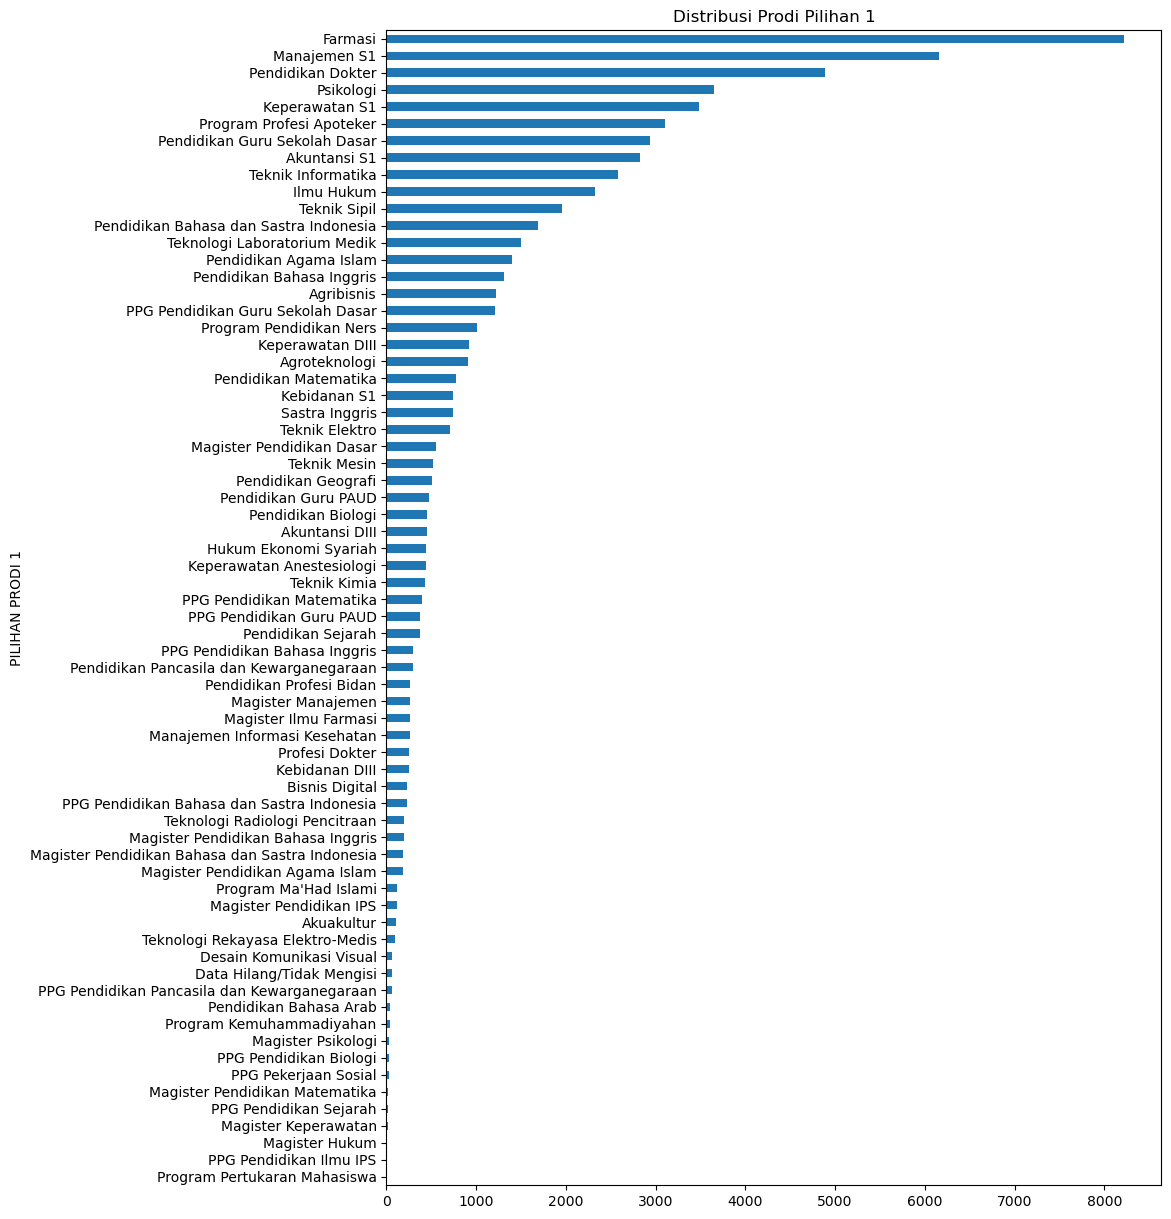

In [102]:
# kolom 'PILIHAN PRODI 1' - visualisasi
df['PILIHAN PRODI 1'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 15))
plt.title('Distribusi Prodi Pilihan 1')
plt.show()

##### FAKULTAS PRODI 1

In [103]:
# kolom 'FAKULTAS PRODI 1'
df['FAKULTAS PRODI 1'].value_counts()

FAKULTAS PRODI 1
Fakultas Farmasi                         11593
Fakultas Keguruan dan Ilmu Pendidikan    11486
Fakultas Ekonomi dan Bisnis               9927
Fakultas Ilmu Kesehatan                   9175
Fakultas Teknik dan Sains                 6192
Fakultas Kedokteran                       5141
Fakultas Psikologi                        3682
Fakultas Hukum                            2338
Fakultas Pertanian dan Perikanan          2239
Fakultas Agama Islam                      2194
Pascasarjana                              1071
Fakultas Ilmu Budaya dan Komunikasi        800
Data Hilang/Tidak Mengisi                   62
Name: count, dtype: int64

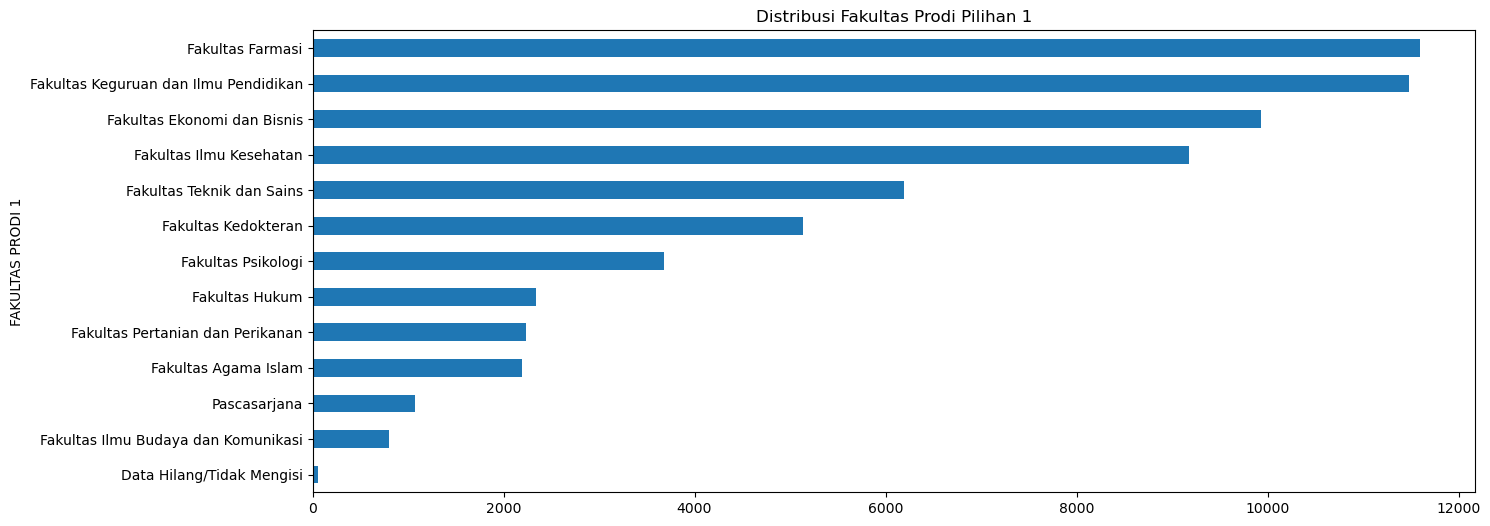

In [104]:
# kolom 'FAKULTAS PRODI 1' - visualisasi
df['FAKULTAS PRODI 1'].value_counts(ascending=True).plot(kind='barh', figsize=(15, 6))
plt.title('Distribusi Fakultas Prodi Pilihan 1')
plt.show()

##### PILIHAN PRODI 2

In [105]:
##### kolom 'PILIHAN PRODI 2'
df['PILIHAN PRODI 2'].value_counts()

PILIHAN PRODI 2
Data Hilang/Tidak Mengisi                   20727
Manajemen S1                                 4618
Psikologi                                    4271
Keperawatan S1                               3688
Akuntansi S1                                 3110
Ilmu Hukum                                   2391
Teknik Informatika                           2338
Pendidikan Bahasa dan Sastra Indonesia       1791
Agribisnis                                   1725
Teknik Sipil                                 1717
Teknologi Laboratorium Medik                 1317
Pendidikan Guru Sekolah Dasar                1316
Keperawatan DIII                             1287
Agroteknologi                                1253
Kebidanan S1                                 1057
Sastra Inggris                               1017
Teknik Elektro                               1010
Pendidikan Bahasa Inggris                     980
Pendidikan Agama Islam                        929
Keperawatan Anestesiologi         

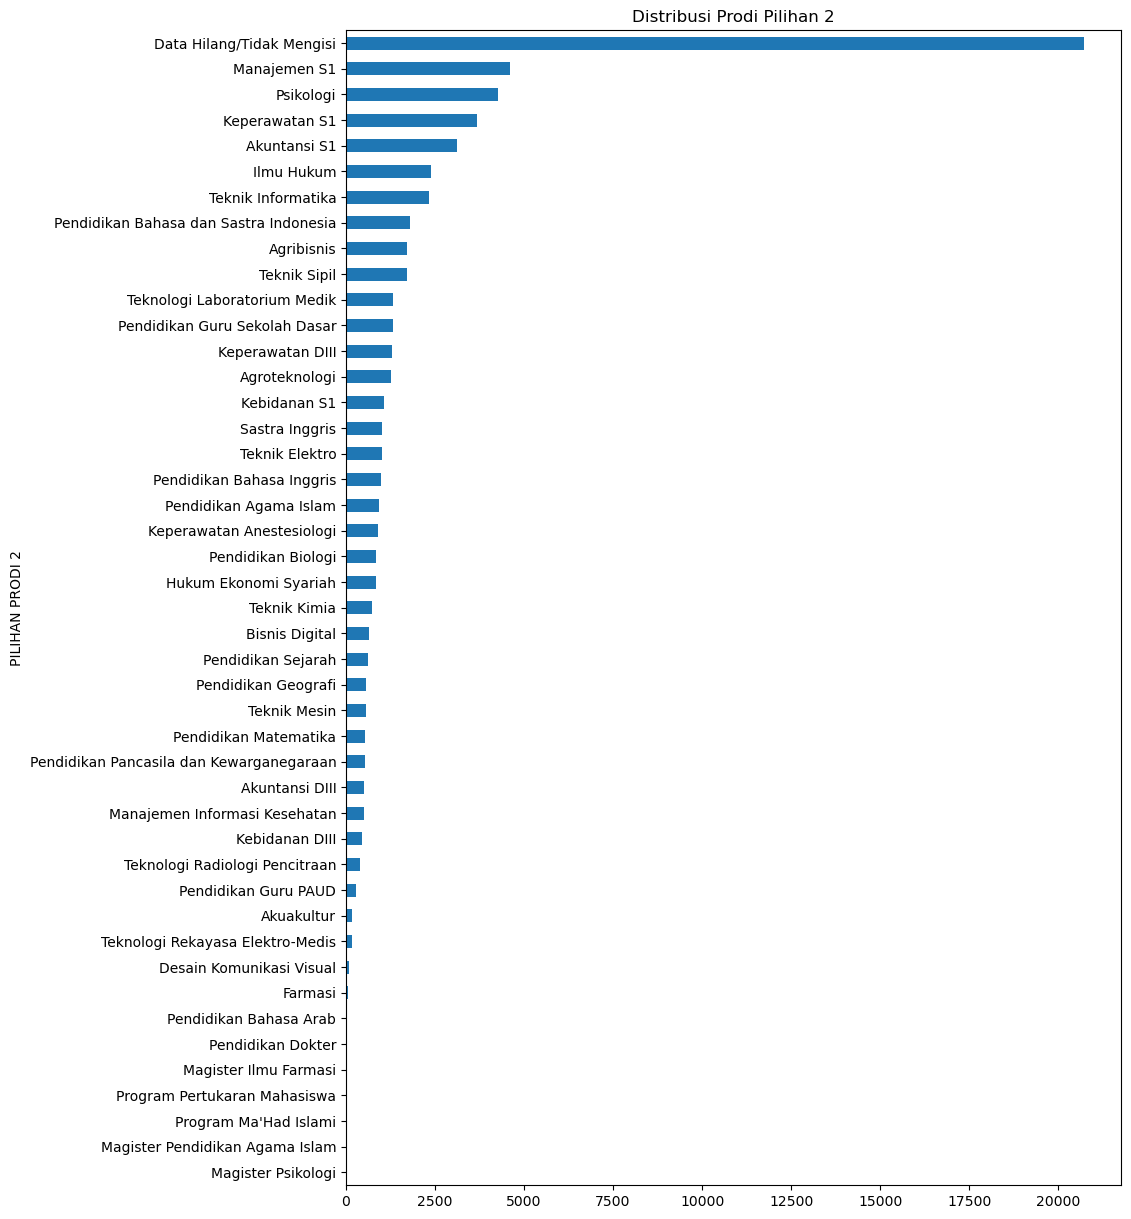

In [106]:
# kolom 'PILIHAN PRODI 2' - visualisasi
df['PILIHAN PRODI 2'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 15))
plt.title('Distribusi Prodi Pilihan 2')
plt.show()

##### FAKULTAS PRODI 2

In [107]:
# kolom 'FAKULTAS PRODI 2'
df['FAKULTAS PRODI 2'].value_counts()

FAKULTAS PRODI 2
Data Hilang/Tidak Mengisi                20729
Fakultas Ilmu Kesehatan                   9729
Fakultas Ekonomi dan Bisnis               8855
Fakultas Keguruan dan Ilmu Pendidikan     7496
Fakultas Teknik dan Sains                 6348
Fakultas Psikologi                        4272
Fakultas Pertanian dan Perikanan          3147
Fakultas Hukum                            2391
Fakultas Agama Islam                      1761
Fakultas Ilmu Budaya dan Komunikasi       1106
Fakultas Farmasi                            56
Fakultas Kedokteran                         10
Name: count, dtype: int64

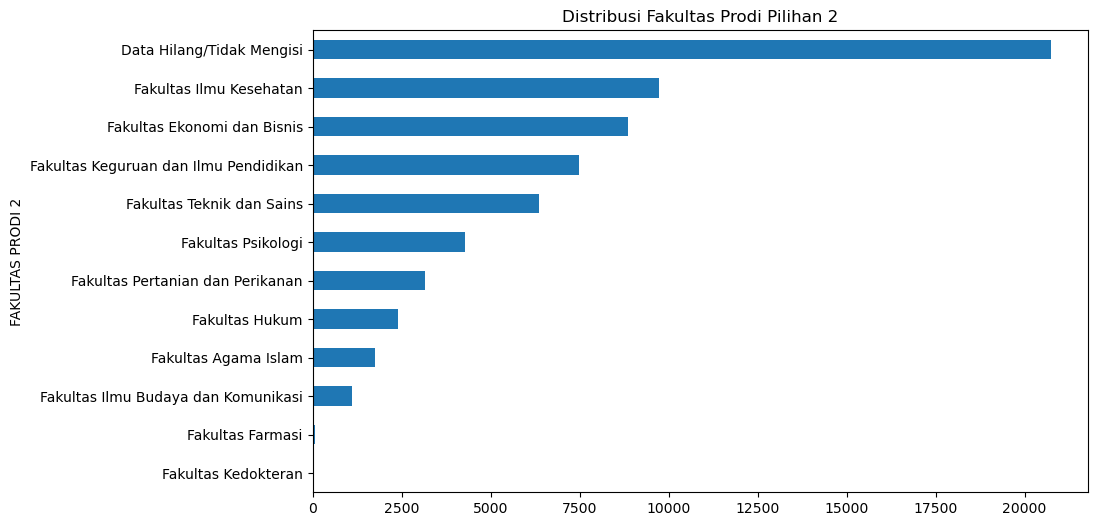

In [108]:
# kolom 'FAKULTAS PRODI 2' - visualisasi
df['FAKULTAS PRODI 2'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribusi Fakultas Prodi Pilihan 2')
plt.show()

##### DITERIMA PRODI

In [109]:
# kolom 'DITERIMA PRODI'
df['DITERIMA PRODI'].value_counts()

DITERIMA PRODI
Data Hilang/Tidak Mengisi                          18790
Manajemen S1                                        4796
Keperawatan S1                                      3752
Psikologi                                           3374
Akuntansi S1                                        2312
Pendidikan Guru Sekolah Dasar                       2295
Teknik Informatika                                  2104
Farmasi                                             1924
Ilmu Hukum                                          1781
Teknik Sipil                                        1642
Teknologi Laboratorium Medik                        1331
Pendidikan Bahasa dan Sastra Indonesia              1251
Pendidikan Dokter                                   1231
PPG Pendidikan Guru Sekolah Dasar                   1205
Pendidikan Agama Islam                              1068
Pendidikan Bahasa Inggris                           1057
Agribisnis                                           954
Keperawatan DIII

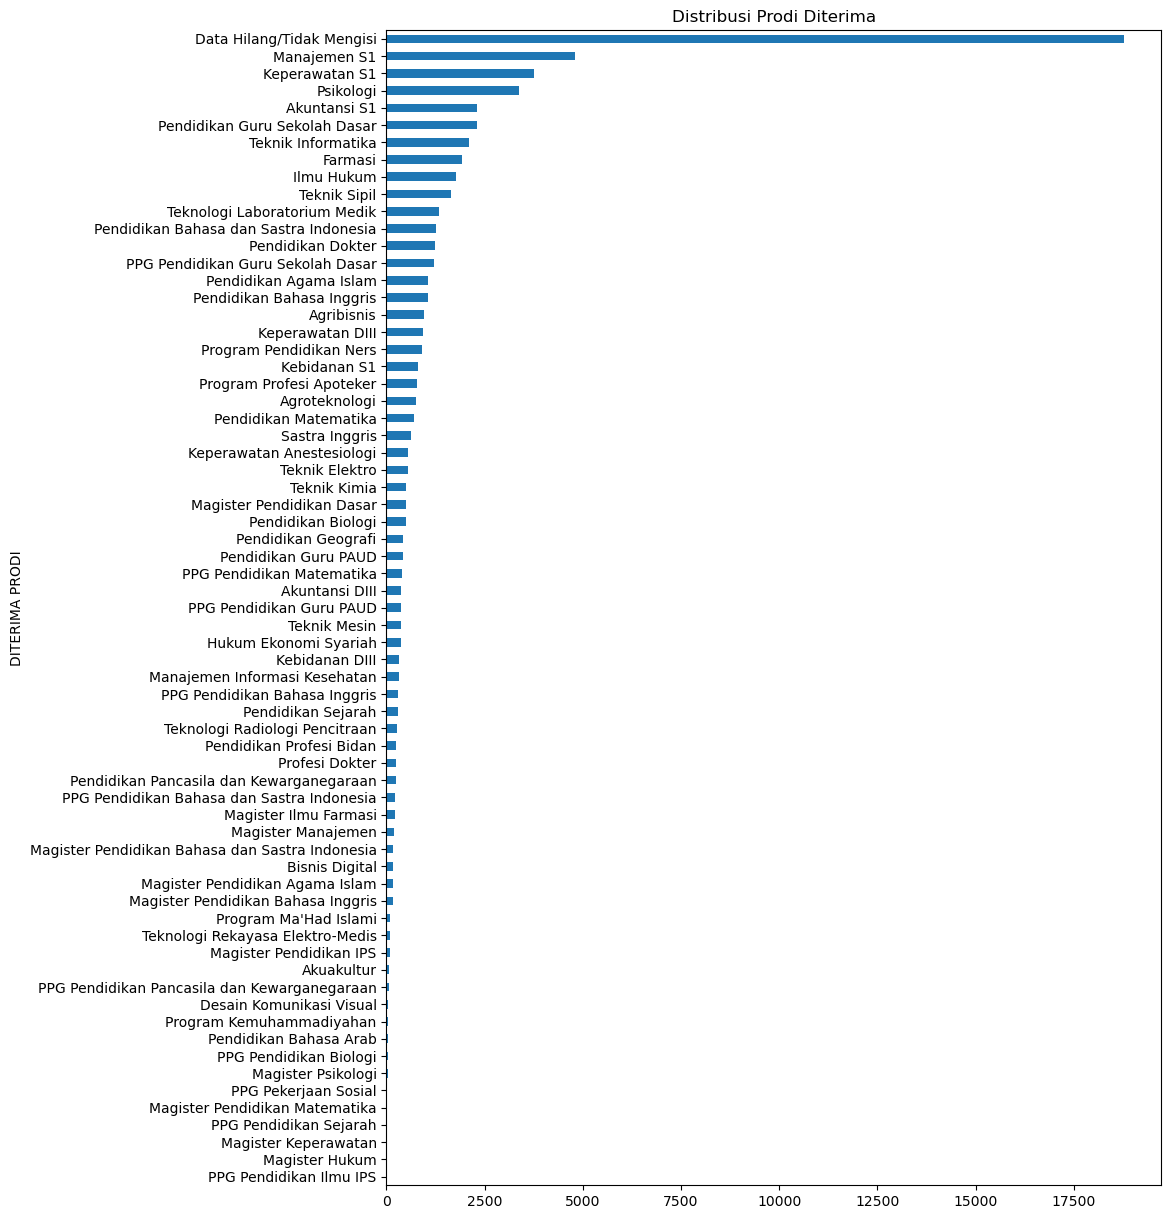

In [110]:
# kolom 'DITERIMA PRODI' - visualisasi
df['DITERIMA PRODI'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 15))
plt.title('Distribusi Prodi Diterima')
plt.show()

##### FAKULTAS PRODI DITERMA

In [111]:
# kolom 'FAKULTAS PRODI DITERMA'
df['FAKULTAS PRODI DITERMA'].value_counts()

FAKULTAS PRODI DITERMA
Data Hilang/Tidak Mengisi                18790
Fakultas Keguruan dan Ilmu Pendidikan     9822
Fakultas Ilmu Kesehatan                   9551
Fakultas Ekonomi dan Bisnis               7843
Fakultas Teknik dan Sains                 5161
Fakultas Psikologi                        3403
Fakultas Farmasi                          2913
Fakultas Hukum                            1792
Fakultas Pertanian dan Perikanan          1791
Fakultas Agama Islam                      1738
Fakultas Kedokteran                       1479
Pascasarjana                               947
Fakultas Ilmu Budaya dan Komunikasi        670
Name: count, dtype: int64

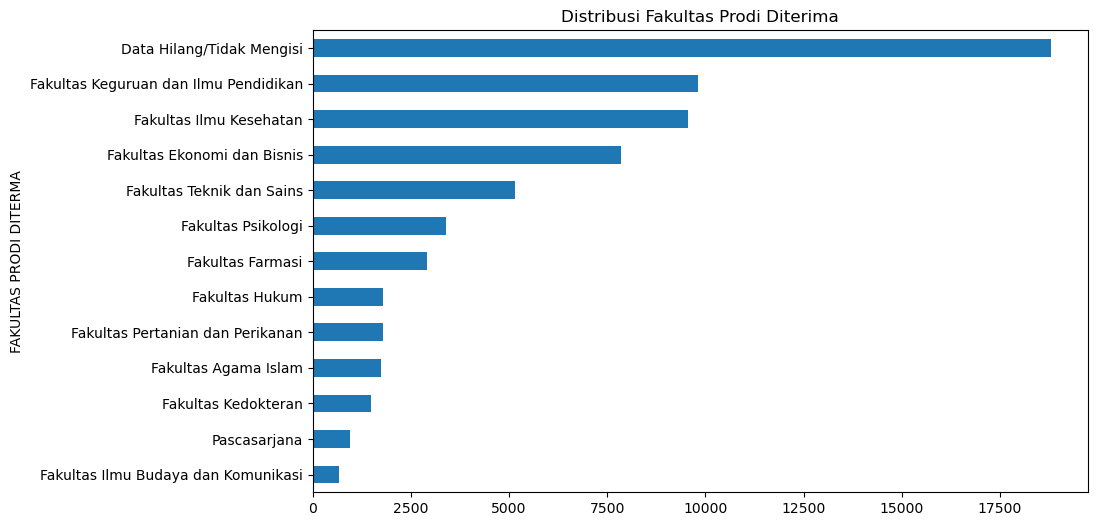

In [112]:
# kolom 'FAKULTAS PRODI DITERMA' - visualisasi
df['FAKULTAS PRODI DITERMA'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribusi Fakultas Prodi Diterima')
plt.show()

##### USIA

In [113]:
# kolom 'USIA'
df['USIA'].value_counts()

USIA
18    62723
17     1410
19      702
22      244
20      175
23      174
21      126
16       58
24       53
25       31
36       17
26       16
29       14
35       14
28       11
42       11
39       10
34        9
31        9
45        9
38        9
47        8
44        7
32        7
27        7
46        6
43        6
49        5
50        5
41        4
48        4
40        4
30        4
33        4
37        3
51        1
Name: count, dtype: Int64

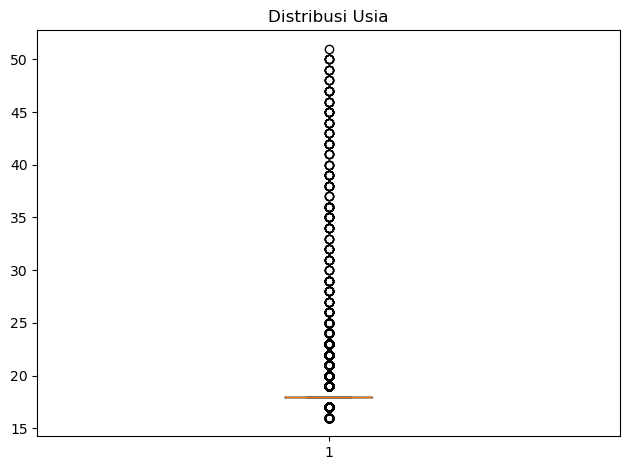

In [114]:
# kolom 'USIA' - visualisasi
plt.boxplot(df['USIA'].dropna())
plt.title('Distribusi Usia')
plt.tight_layout()
plt.show()

##### JURUSAN

In [115]:
# kolom 'JURUSAN'
df['JURUSAN'].value_counts()

JURUSAN
Data Hilang/Tidak Mengisi                                    27896
SMA/MA IPA                                                   21070
SMA/MA IPS                                                    7882
SMK TEKNIK (TKJ, RPL, Otomotif, Pertanian, Agronomi, dll)     3297
SMK FARMASI                                                   2059
SMK NON TEKNIK (Akuntansi, Adm. Perkantoran, dll)             1607
SMK KESEHATAN                                                 1035
SMA/MA AGAMA                                                   619
SMA/MA BAHASA                                                  435
Name: count, dtype: int64

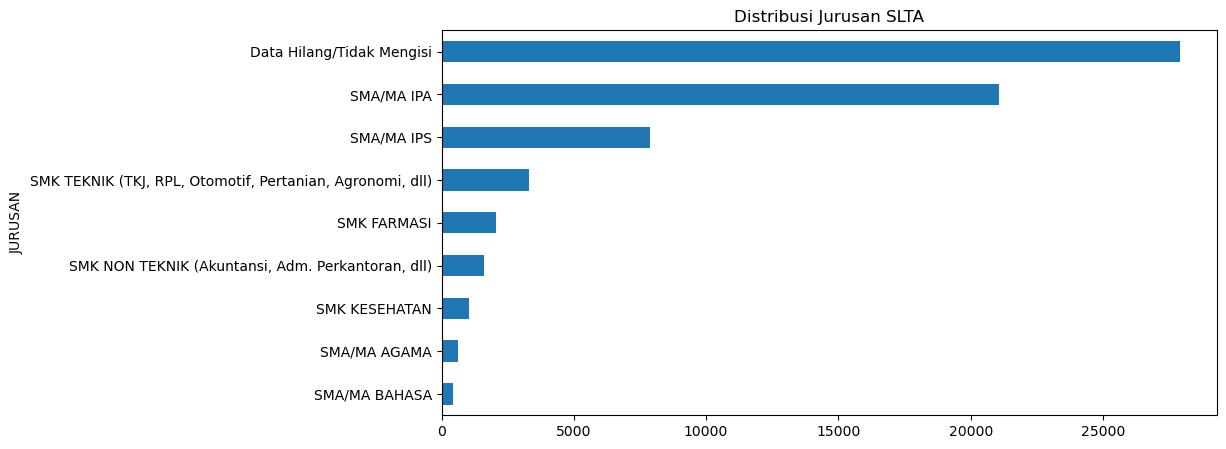

In [116]:
# kolom 'JURUSAN'- visualisasi
df['JURUSAN'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 5))
plt.title('Distribusi Jurusan SLTA')
plt.show()

##### PEND. AYAH

In [117]:
# kolom 'PEND. AYAH'
df['PEND. AYAH'].value_counts()

PEND. AYAH
Data Hilang/Tidak Mengisi    33800
SMA / Sederajat              11873
SD / Sederajat                5938
S1                            5850
SMP / Sederajat               4092
D3                            1350
S2                            1156
Putus SD                       510
Tidak Sekolah                  273
D2                             191
Paket C                        153
D4                             143
D1                             136
Lainnya                        125
Profesi                        118
S3                              78
PAUD                            49
Sp-1                            19
Paket B                         15
TK / Sederajat                  10
Non formal                       9
Informal                         9
Paket A                          3
Name: count, dtype: int64

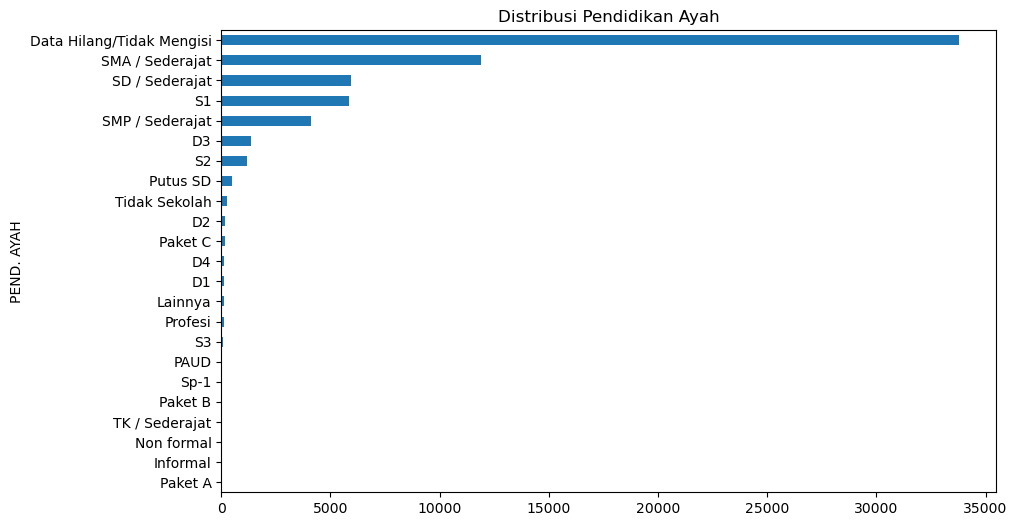

In [118]:
# kolom 'PEND. AYAH' - visualisasi
df['PEND. AYAH'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribusi Pendidikan Ayah')
plt.show()

##### PEND. IBU

In [119]:
# kolom 'PEND. IBU'
df['PEND. IBU'].value_counts()

PEND. IBU
Data Hilang/Tidak Mengisi    33800
SMA / Sederajat              10130
SD / Sederajat                6454
S1                            5724
SMP / Sederajat               5630
D3                            1746
S2                             533
Putus SD                       497
Tidak Sekolah                  312
D4                             210
D1                             206
Profesi                        171
D2                             155
Paket C                        112
Lainnya                         69
PAUD                            40
S3                              33
Paket B                         25
TK / Sederajat                  23
Informal                        11
Non formal                       8
Sp-1                             6
Paket A                          5
Name: count, dtype: int64

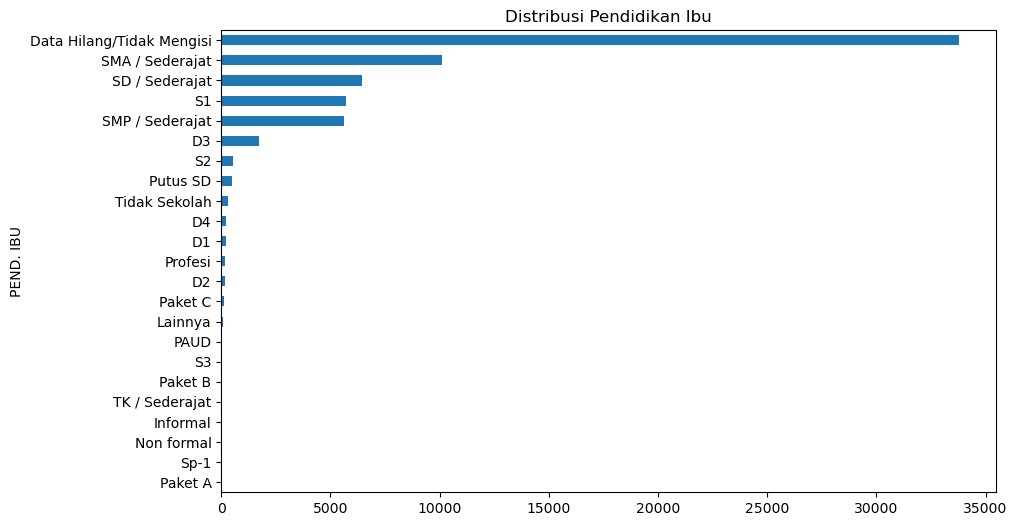

In [120]:
# kolom 'PEND. IBU' - visualisasi
df['PEND. IBU'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribusi Pendidikan Ibu')
plt.show()

##### PEKERJAAN IBU

In [121]:
# kolom 'PEKERJAAN IBU'
df['PEKERJAAN IBU'].value_counts()

PEKERJAAN IBU
Data Hilang/Tidak Mengisi    33800
Tidak bekerja                13339
PNS/TNI/Polri                 4193
Lainnya                       3491
Pedagang Kecil                2645
Wiraswasta                    2325
Karyawan Swasta               1462
Petani                        1316
Sudah Meninggal                947
Wirausaha                      925
Buruh                          729
Pensiunan                      501
Pedagang Besar                 169
Peternak                        42
Nelayan                         16
Name: count, dtype: int64

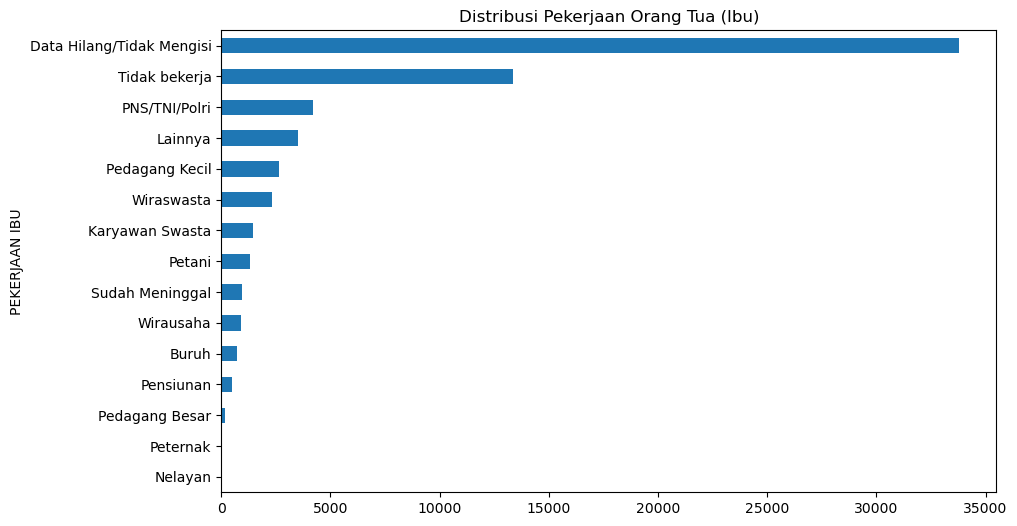

In [122]:
# kolom 'PEKERJAAN IBU'
df['PEKERJAAN IBU'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribusi Pekerjaan Orang Tua (Ibu)')
plt.show()

### tambahan : bikin kolom kab/kota, provinsi

In [123]:
# ekstrak value + bikin kolom Kabupaten/Kota
def extract_region(alamat):
    if pd.isnull(alamat):
        return None
    match_kab = re.search(r'KAB\.\s*([^,]+)', alamat, flags=re.IGNORECASE)
    match_kota = re.search(r'KOTA\s*([^,]+)', alamat, flags=re.IGNORECASE)
    if match_kab:
        return match_kab.group(1).strip().title()
    elif match_kota:
        return match_kota.group(1).strip().title()
    return None

df['Kabupaten/Kota'] = df['ALAMAT DOMISILI'].apply(extract_region)
df[~df['Kabupaten/Kota'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA,KODE POS,Kabupaten/Kota
13288,1789456219,JALUR CBT,2017,Program Profesi Apoteker,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,SMAN 1 LAKBOK,SMA/MA IPA,", KERTAJAYA, RT 06, RW 06, KEC. KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",", Kertajaya, RT 06, RW 06, KEC. KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",SMA / Sederajat,SMP / Sederajat,Pedagang Kecil,", , RT 06, RW 06, KEC. , KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",46385,Ciamis
13549,1721059,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141","JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,53141,Banyumas
13550,1721032,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"Jalan Kulon No.526 , Sudagaran, RT 06, RW 02, KEC. Kec. Banyumas, Kab. Banyumas, PROV. Jawa Tengah, kode Pos 53192","GREEN LAHAT/MANGGALA, Siingapure, RT 000, RW 000, KEC. Kec. Kota Agung, Kab. Lahat, PROV. Sumatera Selatan, KODEPOS 31462",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,31462,Lahat
14135,1721062,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Pendidikan Dasar,Pascasarjana,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"DK. KRAJAN 1, Jatisawit, RT 002, RW 002, KEC. Kec. Bumiayu, Kab. Brebes, PROV. Jawa Tengah, KODEPOS 52273","DUKUH KARANG ANGGRUNG, Jatisawit, RT 004, RW 002, KEC. Kec. Bumiayu, Kab. Brebes, PROV. Jawa Tengah, KODEPOS 52273",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,52273,Brebes
14136,1721079,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Pendidikan Dasar,Pascasarjana,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"PERUM KOBER INDAH JL. SREMPENG KULON BLOK G, Kober , RT 02, RW 08, KEC. Kec. Purwokerto Barat, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53132","PERUM KOBER INDAH JL. SREMPENG KULON BLOK G, Kober , RT 02, RW 08, KEC. Kec. Purwokerto Barat, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53132",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,53132,Banyumas


In [124]:
# melihat kota
df[(~df['Kabupaten/Kota'].isna()) & (~df['Kabupaten/Kota'].str.contains('KABUPATEN', na=False))].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA,KODE POS,Kabupaten/Kota
13288,1789456219,JALUR CBT,2017,Program Profesi Apoteker,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,SMAN 1 LAKBOK,SMA/MA IPA,", KERTAJAYA, RT 06, RW 06, KEC. KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",", Kertajaya, RT 06, RW 06, KEC. KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",SMA / Sederajat,SMP / Sederajat,Pedagang Kecil,", , RT 06, RW 06, KEC. , KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",46385,Ciamis
13549,1721059,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141","JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,53141,Banyumas
13550,1721032,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"Jalan Kulon No.526 , Sudagaran, RT 06, RW 02, KEC. Kec. Banyumas, Kab. Banyumas, PROV. Jawa Tengah, kode Pos 53192","GREEN LAHAT/MANGGALA, Siingapure, RT 000, RW 000, KEC. Kec. Kota Agung, Kab. Lahat, PROV. Sumatera Selatan, KODEPOS 31462",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,31462,Lahat
14135,1721062,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Pendidikan Dasar,Pascasarjana,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"DK. KRAJAN 1, Jatisawit, RT 002, RW 002, KEC. Kec. Bumiayu, Kab. Brebes, PROV. Jawa Tengah, KODEPOS 52273","DUKUH KARANG ANGGRUNG, Jatisawit, RT 004, RW 002, KEC. Kec. Bumiayu, Kab. Brebes, PROV. Jawa Tengah, KODEPOS 52273",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,52273,Brebes
14136,1721079,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Pendidikan Dasar,Pascasarjana,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"PERUM KOBER INDAH JL. SREMPENG KULON BLOK G, Kober , RT 02, RW 08, KEC. Kec. Purwokerto Barat, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53132","PERUM KOBER INDAH JL. SREMPENG KULON BLOK G, Kober , RT 02, RW 08, KEC. Kec. Purwokerto Barat, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53132",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,53132,Banyumas


In [125]:
# ekstrak + bikin provinsi
def extract_provinsi(alamat):
    if pd.isnull(alamat):
        return None
    match = re.search(r'PROV\.\s*([^,]+)', alamat, flags=re.IGNORECASE)
    if match:
        prov = match.group(1).strip().title()
        return prov
    return None

df['PROVINSI'] = df['ALAMAT DOMISILI'].apply(extract_provinsi)
df[~df['PROVINSI'].isna()].head()

,NOPEN,JALUR,TAHUN,PILIHAN PRODI 1,FAKULTAS PRODI 1,PILIHAN PRODI 2,FAKULTAS PRODI 2,DITERIMA PRODI,FAKULTAS PRODI DITERMA,USIA,ASAL SLTA,JURUSAN,ALAMAT ASAL,ALAMAT DOMISILI,PEND. AYAH,PEND. IBU,PEKERJAAN IBU,ALAMAT ORANG TUA,KODE POS,Kabupaten/Kota,PROVINSI
13288,1789456219,JALUR CBT,2017,Program Profesi Apoteker,Fakultas Farmasi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,SMAN 1 LAKBOK,SMA/MA IPA,", KERTAJAYA, RT 06, RW 06, KEC. KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",", Kertajaya, RT 06, RW 06, KEC. KEC. LAKBOK, KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",SMA / Sederajat,SMP / Sederajat,Pedagang Kecil,", , RT 06, RW 06, KEC. , KAB. CIAMIS, PROV. JAWA BARAT, KODEPOS 46385",46385,Ciamis,Jawa Barat
13549,1721059,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141","JALAN S. PARMAN 130, Purwokerto Kulon, RT 05, RW 04, KEC. Kec. Purwokerto Selatan, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53141",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,53141,Banyumas,Jawa Tengah
13550,1721032,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"Jalan Kulon No.526 , Sudagaran, RT 06, RW 02, KEC. Kec. Banyumas, Kab. Banyumas, PROV. Jawa Tengah, kode Pos 53192","GREEN LAHAT/MANGGALA, Siingapure, RT 000, RW 000, KEC. Kec. Kota Agung, Kab. Lahat, PROV. Sumatera Selatan, KODEPOS 31462",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,31462,Lahat,Sumatera Selatan
14135,1721062,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Pendidikan Dasar,Pascasarjana,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"DK. KRAJAN 1, Jatisawit, RT 002, RW 002, KEC. Kec. Bumiayu, Kab. Brebes, PROV. Jawa Tengah, KODEPOS 52273","DUKUH KARANG ANGGRUNG, Jatisawit, RT 004, RW 002, KEC. Kec. Bumiayu, Kab. Brebes, PROV. Jawa Tengah, KODEPOS 52273",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,52273,Brebes,Jawa Tengah
14136,1721079,PASCASARJANA,2017,Magister Pendidikan Dasar,Pascasarjana,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Magister Pendidikan Dasar,Pascasarjana,18,Data Hilang/Tidak Mengisi,SMA/MA IPA,"PERUM KOBER INDAH JL. SREMPENG KULON BLOK G, Kober , RT 02, RW 08, KEC. Kec. Purwokerto Barat, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53132","PERUM KOBER INDAH JL. SREMPENG KULON BLOK G, Kober , RT 02, RW 08, KEC. Kec. Purwokerto Barat, Kab. Banyumas, PROV. Jawa Tengah, KODEPOS 53132",Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,Data Hilang/Tidak Mengisi,NaN,53132,Banyumas,Jawa Tengah


### Ekspor / Load clean dataset

In [126]:
# ekspor/load dataset bersih
#df.to_csv(r"D:\Dhika Ramadhan Saputra\Data Analist\Full Project\Tren Penerimaan MABA UMP 2014 - 2024\dataset\clean\(clean) dataset gabungan_kolom baru.csv", index=False)